# **Sprint 1 - Data Visualization**

#### Import Libraries

In [ ]:
%pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error,r2_score
from numpy import arange
from sklearn.model_selection import GridSearchCV

from math import sqrt
import warnings

### Data Upload

#### Uploading data from Dropbox to colab

In [ ]:
!wget -O CECS551_dataset_01.zip https://www.dropbox.com/s/xvyy393qf02b18c/CECS551_dataset_01.zip?dl=0

--2022-12-01 20:34:08--  https://www.dropbox.com/s/xvyy393qf02b18c/CECS551_dataset_01.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvyy393qf02b18c/CECS551_dataset_01.zip [following]
--2022-12-01 20:34:08--  https://www.dropbox.com/s/raw/xvyy393qf02b18c/CECS551_dataset_01.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9333ac2cf1a976901edcad78a8.dl.dropboxusercontent.com/cd/0/inline/Bx0MWwPH8FKatH2qTO_MXZg4MXfXCd3LwO8xhnwkMN7_pK5EHKWHVF8K6XwNBs3oiKrd_f95bAhfDS4WinQm8MR8LuQ4SWt9nYUXdjZcFWu-kJwi4omNOVQnEOFIY-iAoL3Xl7S_DNtYgMvYo8qlcvtGI5q6Ww13-yXt97VJNW5ZmQ/file# [following]
--2022-12-01 20:34:09--  https://uc9333ac2cf1a976901edcad78a8.dl.dropboxusercontent.com/cd/0/inline/Bx0MWwPH8FKatH2qTO_MXZg4MXfXCd3LwO8xhnwkMN7_p

In [ ]:
#Unzip file in Colab

!pip install patool
import patoolib
patoolib.extract_archive('CECS551_dataset_01.zip')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
patool: Extracting CECS551_dataset_01.zip ...
patool: running /usr/bin/7z x -o./Unpack_0_jifbwr -- CECS551_dataset_01.zip
patool: ... CECS551_dataset_01.zip extracted to `CECS551_dataset_011' (local file exists).


'CECS551_dataset_011'

#### Read the data from folder

In [ ]:
# Reading store features
store_01_df = pd.read_csv('/content/CECS551_dataset_01/store_features/store_01.csv')
store_02_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_02.xlsx')
store_03_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_03.xlsx')
store_04_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_04.xlsx')
store_05_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_05.xlsx')
store_06_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_06.xlsx')
store_07_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_07.xlsx')
store_08_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_08.xlsx')
store_09_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_09.xlsx')
store_10_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_10.xlsx')
store_11_35_df = pd.read_excel('/content/CECS551_dataset_01/store_features/store_11_35.xlsx')

#### Combine all stores feature

In [ ]:
features_df= pd.concat([store_01_df, store_02_df, store_03_df, store_04_df,store_05_df,store_06_df,store_07_df,store_08_df,store_09_df,store_10_df,store_11_35_df])

features_df.tail() #priting last 5 records

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
4545,35,2013-06-28 00:00:00,False,77.34,3.639,4764.55,85.65,NaN,4660.01,NaN,NaN
4546,35,2013-07-05 00:00:00,False,77.41,3.614,6333.87,138.09,610.35,7224.45,NaN,NaN
4547,35,2013-07-12 00:00:00,False,80.74,3.614,4798.18,130.88,22.05,2351.60,NaN,NaN
4548,35,2013-07-19 00:00:00,False,83.36,3.737,2318.53,122.30,23.45,771.35,NaN,NaN
4549,35,2013-07-26 00:00:00,False,77.01,3.804,237.96,50.00,4.00,23.64,NaN,NaN


In [ ]:
# Reading other files

train_df = pd.read_csv("/content/CECS551_dataset_01/train.csv")
stores_df = pd.read_csv("/content/CECS551_dataset_01/stores.csv")
test_df = pd.read_csv("/content/CECS551_dataset_01/test.csv")

train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


### Merge all the files

In [ ]:
feature = features_df.merge(stores_df, how='inner', on='Store')
feature.head()

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Type,Size
0,1,2/5/2010,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,A,151315
1,1,2/12/2010,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,A,151315
2,1,2/19/2010,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,A,151315
3,1,2/26/2010,False,60.12,3.555,6129.28,1802.84,NaN,301.48,224.132020,6.833,A,151315
4,1,3/5/2010,False,61.65,3.630,3552.58,601.32,NaN,2666.22,224.347025,6.833,A,151315


In [ ]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6370 entries, 0 to 6369
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store                  6370 non-null   int64  
 1   Date                   6370 non-null   object 
 2   IsHoliday              6370 non-null   bool   
 3   Temperature            6370 non-null   float64
 4   gas_price              6370 non-null   float64
 5   discount_promotional   3224 non-null   float64
 6   discount_clearance     2500 non-null   float64
 7   discount_damaged_good  2970 non-null   float64
 8   discount_competitive   3065 non-null   float64
 9   CPI                    5902 non-null   float64
 10  Unemployment           5915 non-null   float64
 11  Type                   6370 non-null   object 
 12  Size                   6370 non-null   int64  
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 653.2+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


> In all above dataframes we will convert type of date column to DateTime. Also Test dataset doesnt have Weekly_sale we will predict that in future sprints. We will visualize training dataset.

In [ ]:
from datetime import datetime
feature['Date'] = pd.to_datetime(feature['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [ ]:
# merging feature with trainign dataset
training = train_df.merge(feature, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
# merging feature with test dataset
test = test_df.merge(feature, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
training['Week'] = training.Date.dt.week # for the week data
training['Month'] = training.Date.dt.month # for the month data
training['Year'] = training.Date.dt.year # for the year data

training.head()

<ipython-input-15-95d0eb479d25>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,A,151315,5,2,2010
1,1,1,2010-02-12,46039.49,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,A,151315,6,2,2010
2,1,1,2010-02-19,41595.55,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,A,151315,7,2,2010
3,1,1,2010-02-26,19403.54,False,60.12,3.555,6129.28,1802.84,NaN,301.48,224.132020,6.833,A,151315,8,2,2010
4,1,1,2010-03-05,21827.90,False,61.65,3.630,3552.58,601.32,NaN,2666.22,224.347025,6.833,A,151315,9,3,2010


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340287 entries, 0 to 340286
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  340287 non-null  int64         
 1   Dept                   340287 non-null  int64         
 2   Date                   340287 non-null  datetime64[ns]
 3   Weekly_Sales           340287 non-null  float64       
 4   IsHoliday              340287 non-null  bool          
 5   Temperature            340287 non-null  float64       
 6   gas_price              340287 non-null  float64       
 7   discount_promotional   127337 non-null  float64       
 8   discount_clearance     98863 non-null   float64       
 9   discount_damaged_good  117213 non-null  float64       
 10  discount_competitive   123013 non-null  float64       
 11  CPI                    339369 non-null  float64       
 12  Unemployment           339369 non-null  floa

In [ ]:
training.shape

(340287, 18)

In [ ]:
training.describe()

,Store,Dept,Weekly_Sales,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Size,Week,Month,Year
count,340287.000000,340287.000000,340287.000000,340287.000000,340287.000000,127337.000000,98863.000000,117213.000000,123013.000000,339369.000000,339369.000000,340287.000000,340287.000000,340287.000000,340287.000000
mean,17.801926,43.923047,16756.346852,59.624196,3.371271,7793.413348,3388.595797,1565.415163,3359.019174,170.141328,7.911781,145409.939604,25.820651,6.448189,2010.966951
std,10.015969,30.023826,23494.800295,18.456037,0.454536,8419.860937,9643.136594,10057.592183,6290.946876,39.795059,1.794918,56536.506905,14.157161,3.244463,0.796800
min,1.000000,1.000000,-4988.940000,-2.060000,2.514000,0.500000,-265.760000,-29.100000,0.460000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,9.000000,19.000000,2540.495000,46.280000,2.942000,2840.780000,42.200000,5.280000,506.450000,132.152129,6.842000,112238.000000,14.000000,4.000000,2010.000000
50%,18.000000,37.000000,8141.060000,61.440000,3.467000,5762.100000,192.000000,27.230000,1447.190000,141.474286,7.852000,151315.000000,26.000000,6.000000,2011.000000
75%,26.000000,72.000000,21156.565000,73.670000,3.742000,9569.490000,1943.200000,111.790000,3578.400000,213.818636,8.549000,203742.000000,38.000000,9.000000,2012.000000
max,35.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,228.729864,14.313000,219622.000000,52.000000,12.000000,2012.000000


In [ ]:
training.isnull().sum()

Store                         0
Dept                          0
Date                          0
Weekly_Sales                  0
IsHoliday                     0
Temperature                   0
gas_price                     0
discount_promotional     212950
discount_clearance       241424
discount_damaged_good    223074
discount_competitive     217274
CPI                         918
Unemployment                918
Type                          0
Size                          0
Week                          0
Month                         0
Year                          0
dtype: int64

> Discount columns has null value. Null values are interpreted as No discount.

In [ ]:
training.Date.min()

Timestamp('2010-02-05 00:00:00')

In [ ]:
training.Date.max()

Timestamp('2012-10-26 00:00:00')

## Data Vizualization

### **A. Identify the key variables for the model using correlation plots, heatmaps, histograms, feature Importance (SHAP)**

In [ ]:
training.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'discount_competitive', 'CPI', 'Unemployment',
       'Type', 'Size', 'Week', 'Month', 'Year'],
      dtype='object')

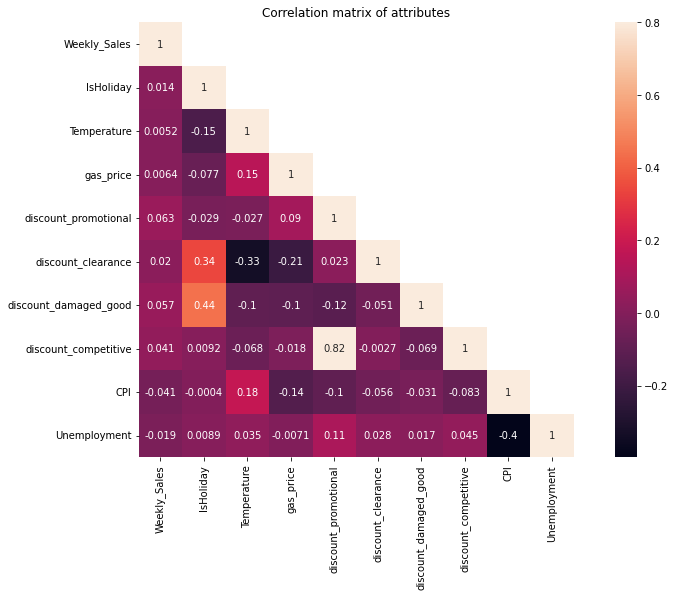

In [ ]:
#Create the correlation matrix
correMtr=training[['Weekly_Sales', 'IsHoliday', 'Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'discount_competitive', 'CPI', 'Unemployment']].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

Distribution of Weekly Sales

> From the correlation graph, there is very strong correlation between discount_competetive and discount_promotional. One of the resaon behind that would be addition of new product in market, either by same company or by the competitor.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'The Distribution of Sales across all store')

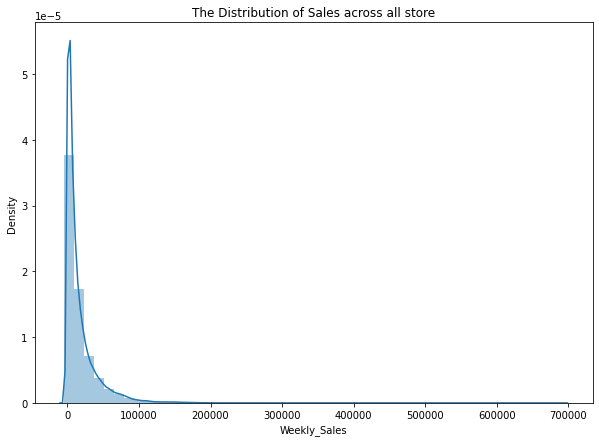

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(training['Weekly_Sales'])
plt.title('The Distribution of Sales across all store')

In [ ]:
#!pip uninstall pandas-profiling
#!pip install pandas-profiling[notebook,html]
#from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file
#profile = ProfileReport(training, title="Sales Dataset", html={'style': {'full_width': True}}, sort=None)
#profile.to_notebook_iframe()

#### **SHAP Values**


```


To determine SHAP values we will run XGBoost regressor on the training dataset. Before running the model. We will take care of null values. Discount null values will be imputed with zero and CPI, Unemployment null values will be removed.

In [ ]:
training.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'discount_competitive', 'CPI', 'Unemployment',
       'Type', 'Size', 'Week', 'Month', 'Year'],
      dtype='object')

In [ ]:
df = training.copy()
df[['discount_promotional', 'discount_clearance','discount_damaged_good', 'discount_competitive']] = df[['discount_promotional', 'discount_clearance','discount_damaged_good', 'discount_competitive']].fillna(value=0)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Store                    0
Dept                     0
Date                     0
Weekly_Sales             0
IsHoliday                0
Temperature              0
gas_price                0
discount_promotional     0
discount_clearance       0
discount_damaged_good    0
discount_competitive     0
CPI                      0
Unemployment             0
Type                     0
Size                     0
Week                     0
Month                    0
Year                     0
dtype: int64

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost
import shap
from sklearn.model_selection import train_test_split


# train XGBoost model
X = df[['Dept','IsHoliday', 'Temperature','gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'discount_competitive', 'CPI', 'Unemployment','Type', 'Size']]
X.IsHoliday = X.IsHoliday.astype(int)
X = pd.get_dummies(X,columns=['Type'])

y = df['Weekly_Sales'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# explain the model's predictions using SHAP values - XGBoost

#model = xgboost.XGBRegressor(max_depth=1).fit(X_train, y_train)
#explainer = shap.Explainer(model.predict, X_test)
#shap_values = explainer(X_test)

#shap.plots.bar(shap_values)
#shap.plots.beeswarm(shap_values)
#shap.plots.bar(shap_values[0])

**Linear Regression Model**

In [ ]:
import statsmodels.api as sm

result = sm.OLS(y_train, X_train).fit()

# printing the summary table
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1787.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:34:34   Log-Likelihood:            -3.1070e+06
No. Observations:              271495   AIC:                         6.214e+06
Df Residuals:                  271481   BIC:                         6.214e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Dept                     93.44

> From above model it is clear that, others features also have impact on Sales. Although models predictive power is very low (R^2 =0.08), it does give few insights on important factors.

In [ ]:
#explainer1 = shap.Explainer(result.predict, X_test)
#shap_values1 = explainer1(X_test)

In [ ]:
#shap.plots.bar(shap_values1)

> Above graph shows important features in determining the sales. **Size of store & Type of store** are crucial to determine Weekly_sale.  We will explore more variables through data visualization. 

In [ ]:
#shap.plots.beeswarm(shap_values1)

> From Beeswarm plot, when size of store is bigger avg sales goes up and reverse is alse true. One of the reason behind that will be availibity & variety of products available in store. Smaller store will have space restriction to add more stuff in inventory thereby less foottraffic and sales. One of the important point to note here is only biggest size causes more sales, medium and low store sizes shows drop in average sale. Department being a categorical variable is still very much important to determine sales. It is clear from the fact that, one dept will perform better than other (Pharmacy, grocery), getting exact name of department will be useful to pinpoint Dept with highest sales. CPI & Unemployement shows negative trend with Sales. Increase in these two will cause sales to go down.

In [ ]:
#shap.plots.bar(shap_values1[0])

> This graph show how smaller size and less department are negatively impacting sales for one of the stores. CPI & Temperature have positive impact on sales.

### **B. For the first 10 stores visualize the weekly and monthly sales patterns for top 35% of the Department sales.**


In [ ]:
data_viz_1_10_df = training[training.Store < 11]

In [ ]:
data_viz_1_10_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,A,151315,5,2,2010
1,1,1,2010-02-12,46039.49,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,A,151315,6,2,2010
2,1,1,2010-02-19,41595.55,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,A,151315,7,2,2010
3,1,1,2010-02-26,19403.54,False,60.12,3.555,6129.28,1802.84,NaN,301.48,224.132020,6.833,A,151315,8,2,2010
4,1,1,2010-03-05,21827.90,False,61.65,3.630,3552.58,601.32,NaN,2666.22,224.347025,6.833,A,151315,9,3,2010


**Determining top 35% department**

In [ ]:
dept_ranking = data_viz_1_10_df.groupby(['Dept'])['Weekly_Sales'].sum().reset_index().sort_values(by = 'Weekly_Sales',ascending=False)
dept_ranking.reset_index(drop=True)

,Dept,Weekly_Sales
0,38,1.063737e+08
1,95,1.052439e+08
2,92,1.037589e+08
3,72,8.489495e+07
4,40,7.399350e+07
...,...,...
74,45,1.321587e+04
75,51,4.029400e+03
76,78,4.189200e+02
77,39,1.092000e+01


In [ ]:
top_35per_dept = dept_ranking.nlargest(int(round(0.35*len(dept_ranking),0)),'Weekly_Sales')['Dept'].values
top_35per_dept

array([38, 95, 92, 72, 40,  2, 90,  8, 13, 91,  4, 93,  9, 10,  7, 94,  5,
       23, 79, 46,  1, 87, 11, 16, 14, 97, 82, 96])

In [ ]:
topdepartment = data_viz_1_10_df[data_viz_1_10_df.Dept.isin(top_35per_dept)]

**Monthly Sales Pattern**

In [ ]:
# Adding month key to dataset
topdepartment['MonthKey'] = pd.to_datetime(topdepartment.Year.astype(str) +'-'+ topdepartment.Month.astype(str) +'-'+ '1' )


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# formatting graph
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
# Example: Jan- 2011
month_year_formatter = mdates.DateFormatter('%b- %Y') 

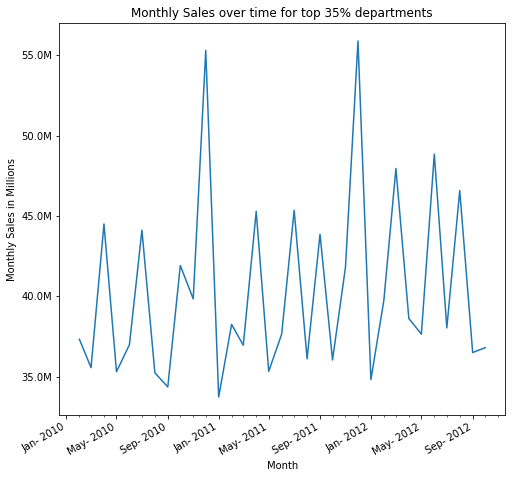

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

data = topdepartment.groupby('MonthKey')['Weekly_Sales'].sum().reset_index()

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
ax.yaxis.set_major_formatter(formatter)
ax.plot(data.MonthKey, data.Weekly_Sales)

plt.xlabel('Month')
plt.ylabel('Monthly Sales in Millions')
plt.title('Monthly Sales over time for top 35% departments')

fig.autofmt_xdate()

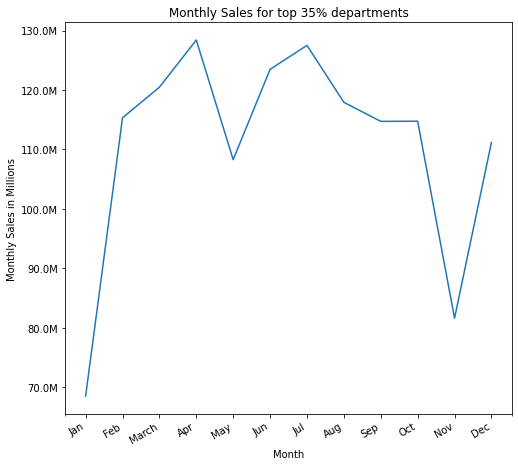

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

data = topdepartment.groupby('Month')['Weekly_Sales'].sum().reset_index()

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_minor_locator(monthly_locator)
ax.yaxis.set_major_formatter(formatter)
labels = ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

ax.plot(data.Month, data.Weekly_Sales)

plt.xlabel('Month')
plt.ylabel('Monthly Sales in Millions')
plt.title('Monthly Sales for top 35% departments')

plt.xticks(data.Month, labels, rotation='vertical')
fig.autofmt_xdate()

In [ ]:
topdepartment.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'discount_competitive', 'CPI', 'Unemployment',
       'Type', 'Size', 'Week', 'Month', 'Year', 'MonthKey'],
      dtype='object')

**Weekely Sales Data**

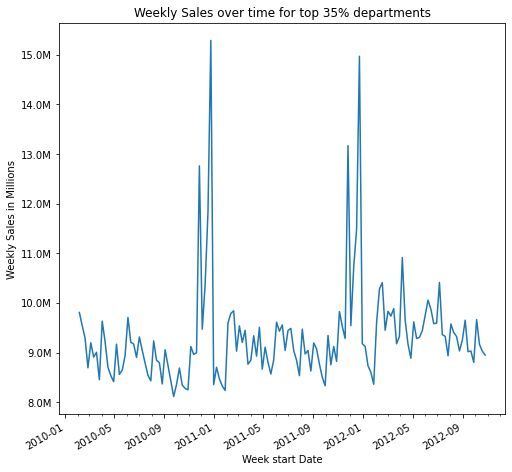

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

data = topdepartment.groupby('Date')['Weekly_Sales'].sum().reset_index()

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_minor_locator(monthly_locator)
ax.yaxis.set_major_formatter(formatter)
ax.plot(data.Date, data.Weekly_Sales)

plt.xlabel('Week start Date')
plt.ylabel('Weekly Sales in Millions')
plt.title('Weekly Sales over time for top 35% departments')

fig.autofmt_xdate()

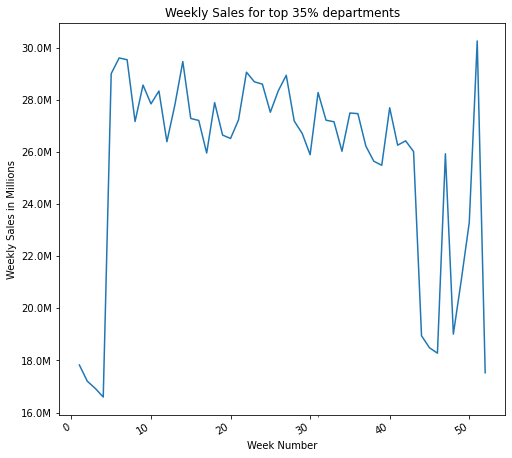

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

data = topdepartment.groupby('Week')['Weekly_Sales'].sum().reset_index()

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_minor_locator(monthly_locator)
ax.yaxis.set_major_formatter(formatter)
ax.plot(data.Week, data.Weekly_Sales)

plt.xlabel('Week Number')
plt.ylabel('Weekly Sales in Millions')
plt.title('Weekly Sales for top 35% departments')

fig.autofmt_xdate()

**B.1. Identify the best department across the first ten stores.**

<class 'numpy.float64'>


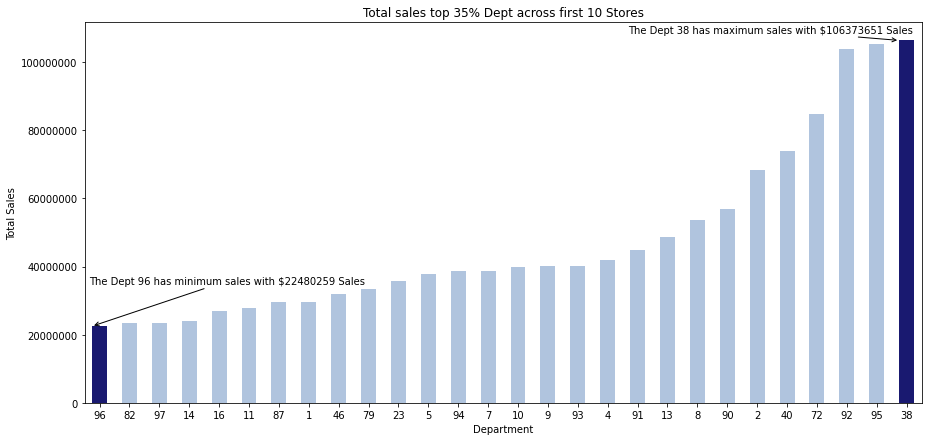

In [ ]:
plt.figure(figsize=(15,7))

# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_dept = topdepartment.groupby('Dept')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_dept_array = np.array(total_sales_for_each_dept) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_dept_array)) and (x > min(total_sales_for_each_dept_array))) else 'midnightblue' for x in total_sales_for_each_dept_array]


ax = total_sales_for_each_dept.plot(kind='bar',color=clrs);

# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The Dept 96 has minimum sales with ${0:.0f} Sales".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[27]
ax.annotate("The Dept 38 has maximum sales with ${0:.0f} Sales".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales top 35% Dept across first 10 Stores')
plt.xlabel('Department')
plt.ylabel('Total Sales');

### **C. Investigate the relationship between weekly sales over CPI and unemployment for the first 10 stores. You can explore the what-if scenarios while writing the report.**

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot: xlabel='CPI', ylabel='Weekly_Sales'>

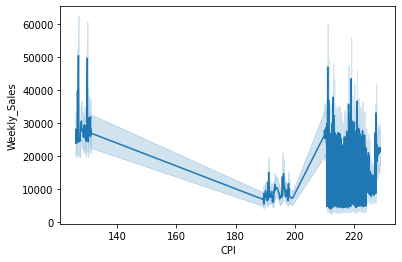

In [ ]:
sns.lineplot(data_viz_1_10_df.CPI,data_viz_1_10_df.Weekly_Sales)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot: xlabel='Unemployment', ylabel='Weekly_Sales'>

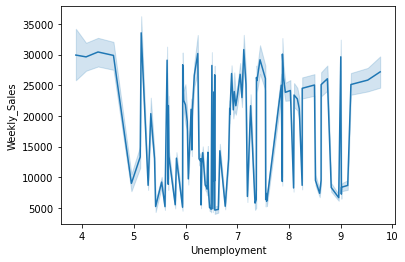

In [ ]:
sns.lineplot(data_viz_1_10_df.Unemployment,data_viz_1_10_df.Weekly_Sales)

### **D. Investigate the impact of various types of discounts, for example, discount promotional, discount clearance, discount damaged good, discount competitive and discount employee on the overall sales.**

In [ ]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


In [ ]:
discounts = training.copy()

In [ ]:
discounts['IsGiven_Promotional'] = np.where(discounts.discount_promotional.isna(),'No','Yes' )
discounts['IsGiven_Clearance'] = np.where(discounts.discount_clearance.isna(),'No','Yes' )
discounts['IsGiven_Damaged_good'] = np.where(discounts.discount_damaged_good.isna(),'No','Yes' )
discounts['IsGiven_Competitive'] = np.where(discounts.discount_competitive.isna(),'No','Yes' )

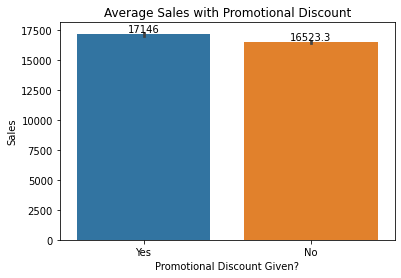

In [ ]:
#plt.figure(figsize = (5,5))
ax = sns.barplot(x = 'IsGiven_Promotional',
           y = 'Weekly_Sales',
           data = discounts)
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Sales')
plt.xlabel('Promotional Discount Given?')
plt.title('Average Sales with Promotional Discount')
plt.show()

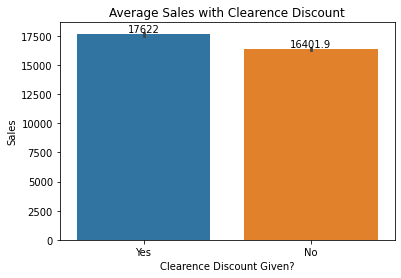

In [ ]:
#plt.figure(figsize = (5,5))
ax = sns.barplot(x = 'IsGiven_Clearance',
           y = 'Weekly_Sales',
           data = discounts)
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Sales')
plt.xlabel('Clearence Discount Given?')
plt.title('Average Sales with Clearence Discount')
plt.show()

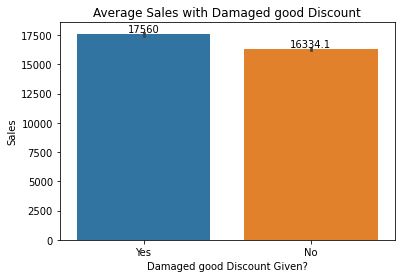

In [ ]:
#plt.figure(figsize = (5,5))
ax = sns.barplot(x = 'IsGiven_Damaged_good',
           y = 'Weekly_Sales',
           data = discounts)
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Sales')
plt.xlabel('Damaged good Discount Given?')
plt.title('Average Sales with Damaged good Discount')
plt.show()

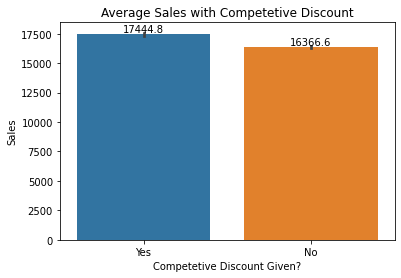

In [ ]:

#plt.figure(figsize = (5,5))
ax = sns.barplot(x = 'IsGiven_Competitive',
           y = 'Weekly_Sales',
           data = discounts)
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Sales')
plt.xlabel('Competetive Discount Given?')
plt.title('Average Sales with Competetive Discount')
plt.show()

**D.1. Which type of discount is helpful in increasing the sales? Consider top 30% of the best performing stores (sales per 1000 square feet).**

**D.2. Does the observed behavior hold true for all the stores? Consider bottom 30% of the least performing store (sales per 1000 square feet).**


In [ ]:
discounts['Sales_per_1000SQFT'] = (discounts['Weekly_Sales'] / discounts['Size'])*1000

In [ ]:
store_ranking = discounts.groupby(['Store'])['Sales_per_1000SQFT'].sum().reset_index().sort_values(by = 'Sales_per_1000SQFT',ascending=False)
store_ranking.reset_index(drop=True).head()

,Store,Sales_per_1000SQFT
0,10,2.146972e+06
1,23,1.735313e+06
2,3,1.540082e+06
3,20,1.479311e+06
4,1,1.469800e+06


In [ ]:
#top 30% stores by sales per 1000 sqft
top_30per = store_ranking.nlargest(int(round(0.30*len(store_ranking),0)),'Sales_per_1000SQFT')['Store'].values
top_30per

array([10, 23,  3, 20,  1, 30,  4, 14, 17,  2])

In [ ]:
#bottom 30% stores by sales per 1000 sqft
bottom_30per = store_ranking.tail(int(round(0.30*len(store_ranking),0)))['Store'].values
bottom_30per

array([11, 28, 34,  8, 29, 32, 25, 21, 15,  9])

In [ ]:
discounts.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'discount_competitive', 'CPI', 'Unemployment',
       'Type', 'Size', 'Week', 'Month', 'Year', 'IsGiven_Promotional',
       'IsGiven_Clearance', 'IsGiven_Damaged_good', 'IsGiven_Competitive',
       'Sales_per_1000SQFT'],
      dtype='object')

In [ ]:
topstores = discounts[discounts.Store.isin(top_30per)]

Promo = (topstores[topstores.IsGiven_Promotional == 'Yes'].groupby('IsGiven_Promotional')['Weekly_Sales'].sum().reset_index())
Promo['Discount'] = 'Promotional'

Clear = (topstores[topstores.IsGiven_Clearance == 'Yes'].groupby('IsGiven_Clearance')['Weekly_Sales'].sum().reset_index())
Clear['Discount'] = 'Clearance'

Damage = (topstores[topstores.IsGiven_Damaged_good == 'Yes'].groupby('IsGiven_Damaged_good')['Weekly_Sales'].sum().reset_index())
Damage['Discount'] = 'Damaged_Good'

Comp = (topstores[topstores.IsGiven_Competitive == 'Yes'].groupby('IsGiven_Competitive')['Weekly_Sales'].sum().reset_index())
Comp['Discount'] = 'Competitive'

discount_top_df = pd.concat([Promo,Clear,Damage,Comp])

In [ ]:
topstores.Store.unique()

array([ 1,  2,  3,  4, 10, 14, 17, 20, 23, 30])

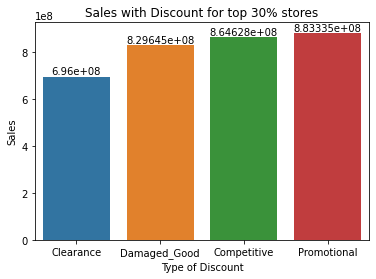

In [ ]:
ax = sns.barplot(x = 'Discount',
           y = 'Weekly_Sales',
           data = discount_top_df,
           order=discount_top_df.sort_values('Weekly_Sales').Discount)
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Sales')
plt.xlabel('Type of Discount')
plt.title('Sales with Discount for top 30% stores')
plt.show()

In [ ]:
bottomstores = discounts[discounts.Store.isin(bottom_30per)]

Promo = (bottomstores[bottomstores.IsGiven_Promotional == 'Yes'].groupby('IsGiven_Promotional')['Weekly_Sales'].sum().reset_index())
Promo['Discount'] = 'Promotional'

Clear = (bottomstores[bottomstores.IsGiven_Clearance == 'Yes'].groupby('IsGiven_Clearance')['Weekly_Sales'].sum().reset_index())
Clear['Discount'] = 'Clearance'

Damage = (bottomstores[bottomstores.IsGiven_Damaged_good == 'Yes'].groupby('IsGiven_Damaged_good')['Weekly_Sales'].sum().reset_index())
Damage['Discount'] = 'Damaged_Good'

Comp = (bottomstores[bottomstores.IsGiven_Competitive == 'Yes'].groupby('IsGiven_Competitive')['Weekly_Sales'].sum().reset_index())
Comp['Discount'] = 'Competitive'

discount_bottom_df = pd.concat([Promo,Clear,Damage,Comp])

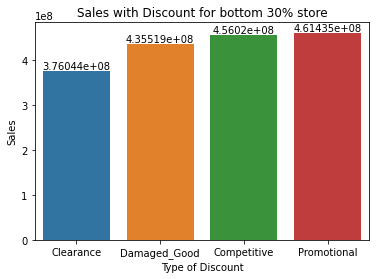

In [ ]:
ax = sns.barplot(x = 'Discount',
           y = 'Weekly_Sales',
           data = discount_bottom_df,
           order=discount_bottom_df.sort_values('Weekly_Sales').Discount)
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Sales')
plt.xlabel('Type of Discount')
plt.title('Sales with Discount for bottom 30% store')
plt.show()

**From above graphs Promotional discounts beings in maximum sales. It is true for top and bottom 30% of stores by sales per 1000 sqft.**

### **E. Identify the products which are highly impacted by external factors: “temperature”, “gas price”, and “holiday”.**

For this analysis we will consider top 3 departments based on their oveall sales. From previous analysis, we already know that Dept 38,95,92 are top department.

In [ ]:
df_top3dept = training[training.Dept.isin([38,95,92])]
df_top3dept.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Type,Size,Week,Month,Year
5118,1,38,2010-02-05,115564.35,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,A,151315,5,2,2010
5119,1,38,2010-02-12,94136.35,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,A,151315,6,2,2010
5120,1,38,2010-02-19,98672.59,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,A,151315,7,2,2010
5121,1,38,2010-02-26,92755.59,False,60.12,3.555,6129.28,1802.84,NaN,301.48,224.132020,6.833,A,151315,8,2,2010
5122,1,38,2010-03-05,108282.86,False,61.65,3.630,3552.58,601.32,NaN,2666.22,224.347025,6.833,A,151315,9,3,2010


For easier interpretation and visualization. We will round temperature to nearest 10s place and gas price will be rounded to one decimal point.

In [ ]:
df_top3dept.Temperature = df_top3dept.Temperature.round(-1)
df_top3dept.gas_price = df_top3dept.gas_price.round(1)
df_top3dept.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Type,Size,Week,Month,Year
5118,1,38,2010-02-05,115564.35,False,60.0,3.4,9667.50,268.29,0.60,8368.15,223.659114,6.833,A,151315,5,2,2010
5119,1,38,2010-02-12,94136.35,True,50.0,3.4,8687.47,1594.87,2.20,2144.87,223.753643,6.833,A,151315,6,2,2010
5120,1,38,2010-02-19,98672.59,False,50.0,3.5,2706.87,3128.74,1.88,2396.68,223.917015,6.833,A,151315,7,2,2010
5121,1,38,2010-02-26,92755.59,False,60.0,3.6,6129.28,1802.84,NaN,301.48,224.132020,6.833,A,151315,8,2,2010
5122,1,38,2010-03-05,108282.86,False,60.0,3.6,3552.58,601.32,NaN,2666.22,224.347025,6.833,A,151315,9,3,2010


#### **Impact of Temperature on Top 3 Department** 



Average Impact of Temperature -30.01


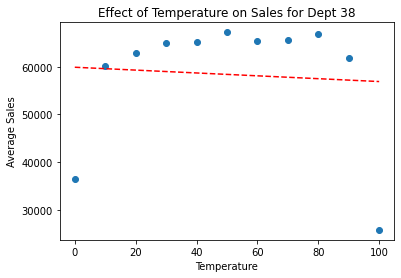

In [ ]:
# Dept =38
df = df_top3dept[df_top3dept.Dept == 38]
df = df.groupby('Temperature')['Weekly_Sales'].mean().reset_index()

x = df['Temperature']
y = df['Weekly_Sales']

f = np.polyfit(x, y, deg=1)
# Slope
print('Average Impact of Temperature', f[0].round(2))

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('Temperature')
plt.ylabel('Average Sales')
plt.title('Effect of Temperature on Sales for Dept 38')
plt.show()




Average Impact of Temperature 224.56


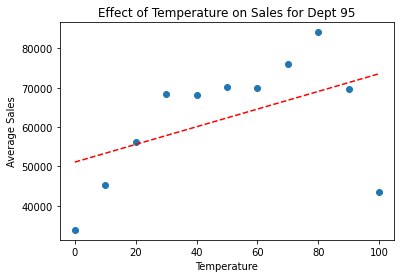

In [ ]:
# Dept =95
df = df_top3dept[df_top3dept.Dept == 95]
df = df.groupby('Temperature')['Weekly_Sales'].mean().reset_index()

x = df['Temperature']
y = df['Weekly_Sales']

f = np.polyfit(x, y, deg=1)
# Slope
print('Average Impact of Temperature', f[0].round(2))

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('Temperature')
plt.ylabel('Average Sales')
plt.title('Effect of Temperature on Sales for Dept 95')
plt.show()

Average Impact of Temperature 112.75


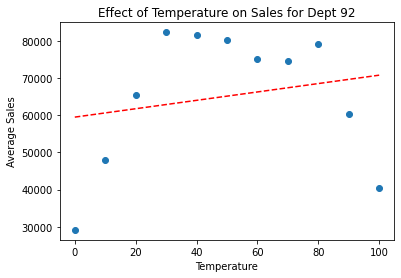

In [ ]:
#Dept = 92
df = df_top3dept[df_top3dept.Dept == 92]
df = df.groupby('Temperature')['Weekly_Sales'].mean().reset_index()

x = df['Temperature']
y = df['Weekly_Sales']

f = np.polyfit(x, y, deg=1)
# Slope
print('Average Impact of Temperature', f[0].round(2))

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('Temperature')
plt.ylabel('Average Sales')
plt.title('Effect of Temperature on Sales for Dept 92')
plt.show()




> Relation between temperature and Sales is not linear. Low and high temperature sees lower sales, considering unwillingness of people to come out it too hot ot too cold weather.  Drawing the trendline shows how temperature is affecting top 3 Department. With temperature, sales for **Dept =38** goes down.

#### **Impact of Gas Prices on Top 3 Dept** 

Average Impact of gas_price -6804.49


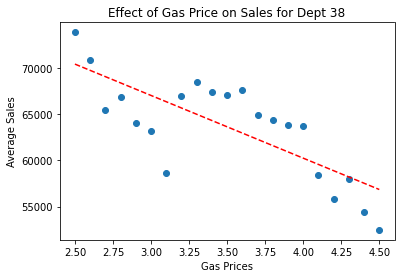

In [ ]:
# Dept =38
df = df_top3dept[df_top3dept.Dept == 38]
df = df.groupby('gas_price')['Weekly_Sales'].mean().reset_index()

x = df['gas_price']
y = df['Weekly_Sales']

f = np.polyfit(x, y, deg=1)
# Slope
print('Average Impact of gas_price', f[0].round(2))

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('Gas Prices')
plt.ylabel('Average Sales')
plt.title('Effect of Gas Price on Sales for Dept 38')
plt.show()




Average Impact of gas_price -3458.2


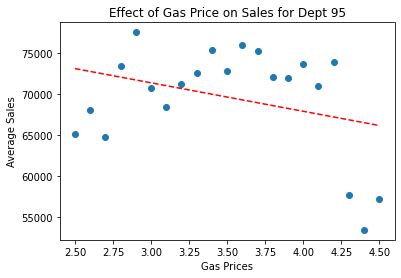

In [ ]:
# Dept =95
df = df_top3dept[df_top3dept.Dept == 95]
df = df.groupby('gas_price')['Weekly_Sales'].mean().reset_index()

x = df['gas_price']
y = df['Weekly_Sales']

f = np.polyfit(x, y, deg=1)
# Slope
print('Average Impact of gas_price', f[0].round(2))

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('Gas Prices')
plt.ylabel('Average Sales')
plt.title('Effect of Gas Price on Sales for Dept 95')
plt.show()




Average Impact of gas_price -5618.89


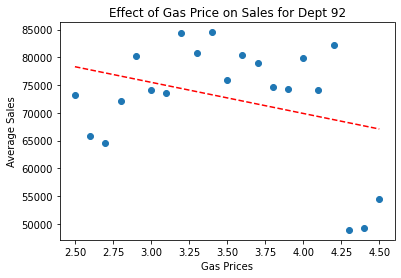

In [ ]:
# Dept =92
df = df_top3dept[df_top3dept.Dept == 92]
df = df.groupby('gas_price')['Weekly_Sales'].mean().reset_index()

x = df['gas_price']
y = df['Weekly_Sales']

f = np.polyfit(x, y, deg=1)
# Slope
print('Average Impact of gas_price', f[0].round(2))

plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('Gas Prices')
plt.ylabel('Average Sales')
plt.title('Effect of Gas Price on Sales for Dept 92')
plt.show()




> General trend for sales with gas prices is negative. With increase in gas prices, sales goes down. **Department =38** is worst affected by gas prices. To further analyse it would be important to look at distance of store from nearby neighborhood. **Department=95** is least affected by gas prices.

#### **Impact of Holiday on top 3 departments**

In [ ]:
df_holiday = df_top3dept.groupby(['Dept','IsHoliday'])['Weekly_Sales'].mean().reset_index()

In [ ]:
df_holiday

,Dept,IsHoliday,Weekly_Sales
0,38,False,65608.562660
1,38,True,61095.218686
2,92,False,75604.333403
3,92,True,80284.070029
4,95,False,72614.952889
5,95,True,69050.103600


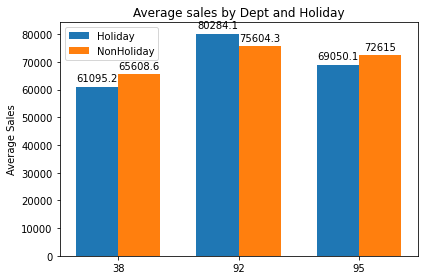

In [ ]:
labels = df_holiday.Dept.unique()
Holiday_mean = df_holiday[df_holiday['IsHoliday']== True].Weekly_Sales.values
NonHoliday_mean = df_holiday[df_holiday['IsHoliday']== False].Weekly_Sales.values

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Holiday_mean, width, label='Holiday')
rects2 = ax.bar(x + width/2, NonHoliday_mean, width, label='NonHoliday')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Sales')
ax.set_title('Average sales by Dept and Holiday')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

> **Department = 92** has higher average sales during Holidays. Other two departments have lower sales during holiday.

#### **Is there any correlation between overall sales and holiday?**

In [ ]:
training.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'discount_competitive', 'CPI', 'Unemployment',
       'Type', 'Size', 'Week', 'Month', 'Year'],
      dtype='object')

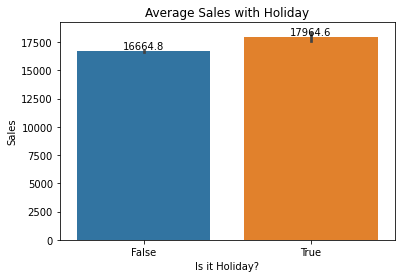

In [ ]:
ax = sns.barplot(x = 'IsHoliday',
           y = 'Weekly_Sales',
           data = training)
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel('Sales')
plt.xlabel('Is it Holiday?')
plt.title('Average Sales with Holiday')
plt.show()

> On an average, sales during holidays is more than non holiday seasons.

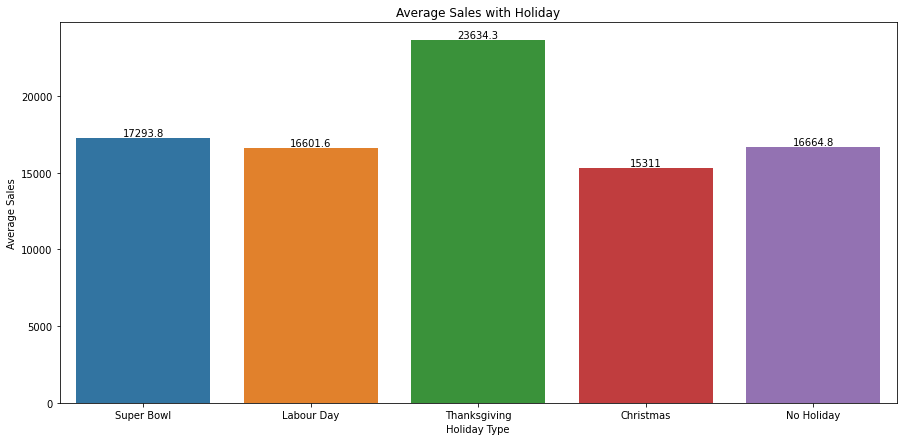

In [ ]:
#Considered data on internet to determine type of holiday and its impact on sales

super_bowl = training[training['Date'].isin(['2010-02-12','2011-02-11','2012-02-10'])]
labour_day = training[training['Date'].isin(['2010-09-10','2011-09-09','2012-09-07'])]
thanksgiving = training[training['Date'].isin(['2010-11-26','2011-11-25','2012-11-23'])]
christmas = training[training['Date'].isin(['2010-12-31','2011-12-30','2012-12-28'])]
no_holiday = training[training['IsHoliday'] == False]

y = [super_bowl['Weekly_Sales'].mean(),
    labour_day['Weekly_Sales'].mean(),
    thanksgiving['Weekly_Sales'].mean(),
    christmas['Weekly_Sales'].mean(),
    no_holiday['Weekly_Sales'].mean()]
x = ['Super Bowl',
    'Labour Day',
    'Thanksgiving',
    'Christmas',
    'No Holiday']

plt.figure(figsize = (15,7))
barplot = sns.barplot(x = x,
           y = y)

barplot.bar_label(barplot.containers[0])

plt.ylabel('Average Sales')
plt.xlabel('Holiday Type')
plt.title('Average Sales with Holiday')
plt.show()

> With no surprise, Thanksgiving sales is highest. Customer tend to do most of the holidat shopping during that time. As a result sales during christmas is lower than usual. There can be multiple factors for this, one is pre shopping, other can be winter, people tend to not go out and celebrate with family.


# **Sprint 2 - Machine Learning Model**


### Data Cleaning

#### Handling Null Values

In [ ]:
#Creating new dataframe for model evaluation and checking null values
training_df = training.copy()
training_df.isna().sum()

Store                         0
Dept                          0
Date                          0
Weekly_Sales                  0
IsHoliday                     0
Temperature                   0
gas_price                     0
discount_promotional     212950
discount_clearance       241424
discount_damaged_good    223074
discount_competitive     217274
CPI                         918
Unemployment                918
Type                          0
Size                          0
Week                          0
Month                         0
Year                          0
dtype: int64

> Discount columns have maximum null values. We have checked previously from correlation plot that, discount_promotional & discount_competitive are highly correlated. We will drop one of these to avoid multi-collinearity. Secondly, we will add columns which gives us insights if discount was given or not. Then, we will replace null values of these discount columns with zero. Missing values in CPI, Unployement are very less, it would be best to drop them.

In [ ]:
training_df.drop(['discount_competitive','Week'],axis=1,inplace=True)

In [ ]:
training_df['IsGiven_Promotional'] = np.where(training_df.discount_promotional.isna(),False,True )
training_df['IsGiven_Clearance'] = np.where(training_df.discount_clearance.isna(),False,True )
training_df['IsGiven_Damaged_good'] = np.where(training_df.discount_damaged_good.isna(),False,True )


In [ ]:
training_df[['discount_promotional', 'discount_clearance','discount_damaged_good']] = training_df[['discount_promotional', 'discount_clearance','discount_damaged_good']].fillna(value=0)


In [ ]:
training_df.dropna(inplace=True)

In [ ]:
classification_df= training_df.copy()

In [ ]:
training_df.isna().sum()

Store                    0
Dept                     0
Date                     0
Weekly_Sales             0
IsHoliday                0
Temperature              0
gas_price                0
discount_promotional     0
discount_clearance       0
discount_damaged_good    0
CPI                      0
Unemployment             0
Type                     0
Size                     0
Month                    0
Year                     0
IsGiven_Promotional      0
IsGiven_Clearance        0
IsGiven_Damaged_good     0
dtype: int64

#### Feature Engineering

In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339369 entries, 0 to 340286
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  339369 non-null  int64         
 1   Dept                   339369 non-null  int64         
 2   Date                   339369 non-null  datetime64[ns]
 3   Weekly_Sales           339369 non-null  float64       
 4   IsHoliday              339369 non-null  bool          
 5   Temperature            339369 non-null  float64       
 6   gas_price              339369 non-null  float64       
 7   discount_promotional   339369 non-null  float64       
 8   discount_clearance     339369 non-null  float64       
 9   discount_damaged_good  339369 non-null  float64       
 10  CPI                    339369 non-null  float64       
 11  Unemployment           339369 non-null  float64       
 12  Type                   339369 non-null  obje

In [ ]:
training_df.Dept = training_df.Dept.astype(str)
training_df.IsHoliday = training_df.IsHoliday.astype(int)
training_df.IsGiven_Promotional = training_df.IsGiven_Promotional.astype(int)
training_df.IsGiven_Clearance = training_df.IsGiven_Clearance.astype(int)
training_df.IsGiven_Damaged_good = training_df.IsGiven_Damaged_good.astype(int)


In [ ]:
training_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'CPI', 'Unemployment', 'Type', 'Size', 'Month',
       'Year', 'IsGiven_Promotional', 'IsGiven_Clearance',
       'IsGiven_Damaged_good'],
      dtype='object')

In [ ]:
training_df_clean = training_df.copy()

In [ ]:

# convert string variable to One Hot Encoding
training_df = pd.get_dummies(training_df, columns = ['Dept','Type'], drop_first =True)


> The graph of Weekly sales vs temperature is not linear. It seems like as temperature increaes weekly sales increases but as diminishing effect. So after certain tempperature sales goes down with increase in temperature. The reason behind that can be people like to shop when its nice weather and prefer not to go out in extreme heat or cold. We will add a **Squared** term for temperature to capture the deminishing return.

In [ ]:
training_df['Temp2']=training_df['Temperature'] * training_df['Temperature']

> Data is preprocessed & adding few more feature, we will remove Date & Store ID from dataframe as they wont add any value for linear regression.

In [ ]:
training_df = training_df.drop(['Date','Month','Year'],axis=1)

In [ ]:
# Dividing dataframe into two dataset
training_df_10 = training_df[training_df.Store < 11]
training_df_11_35 = training_df[training_df.Store > 10]

In [ ]:
training_df_10 = training_df_10.drop(['Store'],axis=1)
training_df_11_35 = training_df_11_35.drop(['Store'],axis=1)

In [ ]:
training_df_10

,Weekly_Sales,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,CPI,Unemployment,Size,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C,Temp2
0,24924.50,0,59.33,3.360,9667.50,268.29,0.60,223.659114,6.833,151315,...,0,0,0,0,0,0,0,0,0,3520.0489
1,46039.49,1,51.65,3.409,8687.47,1594.87,2.20,223.753643,6.833,151315,...,0,0,0,0,0,0,0,0,0,2667.7225
2,41595.55,0,52.39,3.510,2706.87,3128.74,1.88,223.917015,6.833,151315,...,0,0,0,0,0,0,0,0,0,2744.7121
3,19403.54,0,60.12,3.555,6129.28,1802.84,0.00,224.132020,6.833,151315,...,0,0,0,0,0,0,0,0,0,3614.4144
4,21827.90,0,61.65,3.630,3552.58,601.32,0.00,224.347025,6.833,151315,...,0,0,0,0,0,0,0,0,0,3800.7225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97834,22.34,0,82.52,3.966,6091.96,62.82,2.82,131.043000,7.170,126512,...,0,0,0,0,0,1,0,1,0,6809.5504
97835,789.38,0,80.88,4.132,8975.95,0.00,46.24,131.075667,6.943,126512,...,0,0,0,0,0,1,0,1,0,6541.5744
97836,477.24,0,76.03,4.468,2674.51,0.00,10.32,131.108333,6.943,126512,...,0,0,0,0,0,1,0,1,0,5780.5609
97837,578.46,0,72.71,4.449,3067.64,0.00,53.60,131.149968,6.943,126512,...,0,0,0,0,0,1,0,1,0,5286.7441


### Feature Selection

In [ ]:
#pip install featurewiz

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split

#X = training_lr.drop('Weekly_Sales',axis=1)

#y = training_lr['Weekly_Sales'].values

#X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, random_state=1)



In [ ]:
#regressor = RandomForestRegressor()
#regressor.fit(X_train,y_train)

In [ ]:
# make prediction 
#from sklearn.metrics import r2_score
#preds = regressor.predict(X_valid) 
# check performance
#r2_score(preds,y_valid) 

In [ ]:
#from featurewiz import featurewiz
#target = 'Weekly_Sales'
 
#features, train = featurewiz(training_lr, target, corr_limit=0.7, verbose=2, sep=",",
#header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
#print(features)

> Above feature selection method removes some of the important variables as Department is taking precedance. We Will keep above selected departments along with other features to train the model and check for accuracy.

## **Machine Learning Models**

### Linear Regression Without PCA 

In [ ]:
training_lr = training_df_10.copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_rgr = training_lr.drop('Weekly_Sales',axis=1)

y_rgr = training_lr['Weekly_Sales'].values

X_train_lr, X_valid_lr, y_train_lr, y_valid_lr = train_test_split(X_rgr,y_rgr,test_size = 0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

num_data_train  = X_train_lr[['Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'CPI', 'Unemployment','Size','Temp2']]

num_data_valid  = X_valid_lr[['Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'CPI', 'Unemployment','Size','Temp2']]


# update the cols with their normalized values
X_train_lr[num_data_train.columns] = sc.fit_transform(num_data_train)
X_valid_lr[num_data_valid.columns] = sc.transform(num_data_valid)

In [ ]:
X_train_lr.head()

,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,CPI,Unemployment,Size,IsGiven_Promotional,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C,Temp2
16794,0,-0.861599,-0.918434,-0.472020,-0.158712,-0.089848,0.390615,-0.627259,1.114136,0,...,0,0,0,0,0,0,0,0,0,-0.962716
31828,0,-0.000474,-1.594344,-0.472020,-0.158712,-0.089848,-1.915450,0.359778,1.171807,0,...,0,0,0,0,0,0,0,0,0,-0.144079
94504,0,1.088325,-0.453167,-0.472020,-0.158712,-0.089848,-1.916632,1.948604,-0.115105,0,...,0,0,0,0,0,0,0,1,0,1.195807
4551,0,-0.242557,0.894024,0.985102,-0.106943,-0.089634,0.757150,-0.108956,0.287149,1,...,0,0,0,0,0,0,0,0,0,-0.395733
22106,0,-0.934224,-0.631404,-0.472020,-0.158712,-0.089848,0.511240,0.515443,-1.560451,0,...,0,0,0,0,0,0,0,1,0,-1.022021


In [ ]:
import statsmodels.api as sm

lr_OLS_model = sm.OLS(y_train_lr, X_train_lr)
lr_OLS_result = lr_OLS_model.fit()
print(lr_OLS_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              2400.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:36:25   Log-Likelihood:                     -8.5852e+05
No. Observations:               77536   AIC:                                  1.717e+06
Df Residuals:                   77444   BIC:                                  1.718e+06
Df Model:                          92                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

> From above table the R2 for model is 0.74. Model is performing well to predict the sales. Dept has hight impact on sales as p-value for almost all Dept is significant (p < 0.05). As expected Temperature square has negative coefficient. Features that dont have impact on Weekly sales ( p-value > 0.05) :</br>
gas_price </br>IsGiven_Clearance  </br> Dept_19 </br>Dept_27 </br> Dept_28 </br> Dept_36 </br> Dept_19 </br>Dept_39 </br> Dept_51 </br> Dept_60</br>Dept_77</br>  Type_c </br>

**Insights :**
</br> Customer's shopping behavipur doesn't change with increase in gas prices.</br> Customers do care about if promotional offeres & disount on damaged goods.Also amout of offer given improves sales. </br> It doesn't matter if discount is given on clearence items but if the discount given is more then customers prefer to buy that. </br> Most of the departments are different than Dept_1. But few department dont change behaviour of purchase for customers. Getting exact names of department can improve insights.

Removing above variables to check if there is any difference in accuracy.

In [ ]:
X_train_lr = X_train_lr.drop(['gas_price','IsGiven_Clearance','Dept_19','Dept_27','Dept_28','Dept_36','Dept_39','Dept_51','Dept_60','Dept_77'],axis=1)
X_valid_lr = X_valid_lr.drop(['gas_price','IsGiven_Clearance','Dept_19','Dept_27','Dept_28','Dept_36','Dept_39','Dept_51','Dept_60','Dept_77'],axis=1)

In [ ]:
import statsmodels.api as sm

lr_OLS_model_selected = sm.OLS(y_train_lr, X_train_lr)
lr_OLS_result_selected = lr_OLS_model_selected.fit()
print(lr_OLS_result_selected.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              2693.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:36:27   Log-Likelihood:                     -8.5852e+05
No. Observations:               77536   AIC:                                  1.717e+06
Df Residuals:                   77454   BIC:                                  1.718e+06
Df Model:                          82                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

> Removing those features didnt change R2 for the model.

In [ ]:
r2_lr = lr_OLS_result_selected.rsquared.round(2)
r2_lr

0.74

In [ ]:
ypred_lr = lr_OLS_result_selected.predict(X_valid_lr)
rmse_lr_valid = np.sqrt(mean_squared_error(y_valid_lr,ypred_lr)).round(2)
print("Root Mean Squared Error for Linear Regression(Validation):",rmse_lr_valid.round(2))

Root Mean Squared Error for Linear Regression(Validation): 15889.02


In [ ]:
ypred_lr = lr_OLS_result_selected.predict(X_train_lr)
rmse_lr_training = np.sqrt(mean_squared_error(y_train_lr,ypred_lr)).round(2)
print("Root Mean Squared Error for Linear Regression(Training):",rmse_lr_training.round(2))

Root Mean Squared Error for Linear Regression(Training): 15578.16


##### Predicting Weekly_sales for store 11 to 35

In [ ]:
num_data  = training_df_11_35[['Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'CPI', 'Unemployment','Size','Temp2']]

training_df_11_35[num_data_valid.columns] = sc.transform(num_data)

X_test_11_35 = training_df_11_35.drop(['Weekly_Sales','gas_price','IsGiven_Clearance','Dept_19','Dept_27','Dept_28','Dept_36','Dept_39','Dept_51','Dept_60','Dept_77'],axis=1)
y_test_11_35 = training_df_11_35['Weekly_Sales'].values

In [ ]:
ypred_lr = lr_OLS_result_selected.predict(X_test_11_35)
rmse_lr_test = np.sqrt(mean_squared_error(y_test_11_35,ypred_lr)).round(2)
print("Root Mean Squared Error for store 11 to 35 Linear Regression:",rmse_lr_test.round(2))

Root Mean Squared Error for store 11 to 35 Linear Regression: 17825.41


In [ ]:
report_table_regresion =  [['Linear Regression',r2_lr,rmse_lr_training, rmse_lr_valid,rmse_lr_test ]]

In [ ]:
report_table_regresion

[['Linear Regression', 0.74, 15578.16, 15889.02, 17825.41]]

### Linear Regression with PCA

In [ ]:
X_train_pca, X_valid_pca, y_train_pca, y_valid_pca = train_test_split(X_rgr,y_rgr,test_size = 0.2, random_state=1)

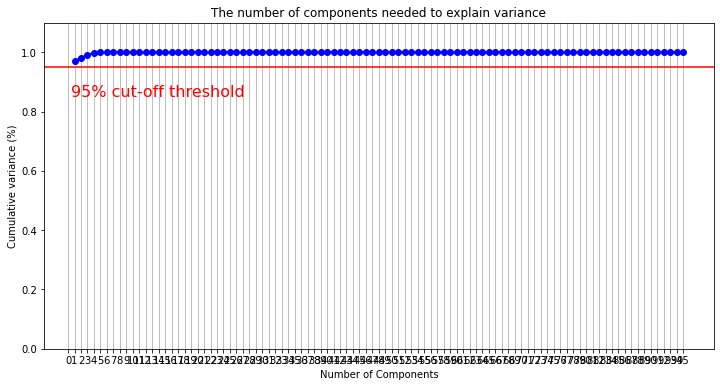

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_rgr)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 96, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 96, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

> Including 8 features can explain varince of more than 95% from prediction label.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)


X_train_pca1 = pca.fit_transform(X_train_pca)
X_valid_pca1 = pca.transform(X_valid_pca)
X_test_pca1 = pca.transform(training_df_11_35.drop('Weekly_Sales',axis=1))

In [ ]:
import statsmodels.api as sm

result = sm.OLS(y_train_lr, X_train_pca1).fit()

# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.075
Model:                            OLS   Adj. R-squared (uncentered):              0.075
Method:                 Least Squares   F-statistic:                              783.4
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:36:31   Log-Likelihood:                     -9.0778e+05
No. Observations:               77536   AIC:                                  1.816e+06
Df Residuals:                   77528   BIC:                                  1.816e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

> R-Squared is very low for PCA with 8 components . Lets change it to 50

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)


X_train_pca1 = pca.fit_transform(X_train_pca)
X_valid_pca1 = pca.transform(X_valid_pca)
X_test_pca1 = pca.transform(training_df_11_35.drop('Weekly_Sales',axis=1))

In [ ]:
import statsmodels.api as sm

result = sm.OLS(y_train_lr, X_train_pca1).fit()

# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.294
Model:                            OLS   Adj. R-squared (uncentered):              0.294
Method:                 Least Squares   F-statistic:                              645.3
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:36:35   Log-Likelihood:                     -8.9730e+05
No. Observations:               77536   AIC:                                  1.795e+06
Df Residuals:                   77486   BIC:                                  1.795e+06
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

> Still the R- squared is very less. Lets use scaled data and check the difference.

In [ ]:
X_pca_scaled= X_rgr.copy()

num_data_rgr = X_rgr[['Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'CPI', 'Unemployment','Size','Temp2']]


X_pca_scaled[num_data_rgr.columns] = sc.transform(num_data_rgr)

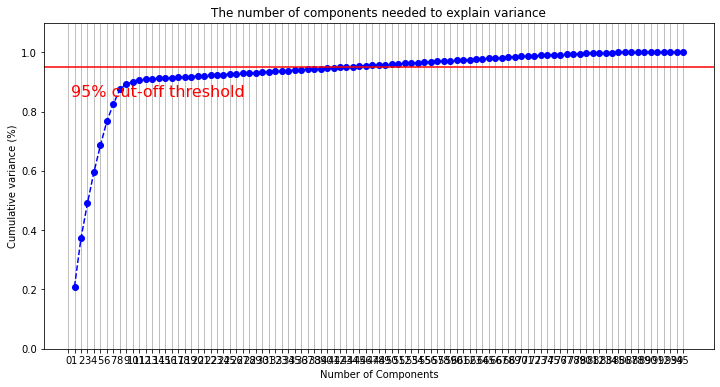

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_pca_scaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 96, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 96, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

> After around n=60 variamce crosses threshold.

In [ ]:
X_train_pca, X_valid_pca, y_train_pca, y_valid_pca = train_test_split(X_pca_scaled,y_rgr,test_size = 0.2, random_state=1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 60)


X_train_pca1 = pca.fit_transform(X_train_pca)
X_valid_pca1 = pca.transform(X_valid_pca)
X_test_pca1 = pca.transform(training_df_11_35.drop('Weekly_Sales',axis=1))

In [ ]:
import statsmodels.api as sm

result = sm.OLS(y_train_lr, X_train_pca1).fit()

# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.351
Method:                 Least Squares   F-statistic:                              700.2
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                        0.00
Time:                        20:36:43   Log-Likelihood:                     -8.9400e+05
No. Observations:               77536   AIC:                                  1.788e+06
Df Residuals:                   77476   BIC:                                  1.789e+06
Df Model:                          60                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

> Still R squared is low. So PCA has no effect to improve model accuracy.

In [ ]:
r2_lr_pca = result.rsquared.round(2)
r2_lr_pca

0.35

In [ ]:
ypred_lr_pca = result.predict(X_train_pca1)
rmse_lr_pca_train = np.sqrt(mean_squared_error(y_train_lr,ypred_lr_pca)).round(2)
print("Root Mean Squared Error for Linear Regression with PCA: (Training)",rmse_lr_pca_train.round(2))

Root Mean Squared Error for Linear Regression with PCA: (Training) 24615.83


In [ ]:
ypred_lr_pca = result.predict(X_valid_pca1)
rmse_lr_pca_valid = np.sqrt(mean_squared_error(y_valid_lr,ypred_lr_pca)).round(2)
print("Root Mean Squared Error for Linear Regression with PCA: (Validation)",rmse_lr_pca_valid.round(2))

Root Mean Squared Error for Linear Regression with PCA: (Validation) 24987.36


In [ ]:
ypred_lr_pca = result.predict(X_test_pca1)
rmse_lr_pca_test = np.sqrt(mean_squared_error(training_df_11_35['Weekly_Sales'],ypred_lr_pca)).round(2)
print("Root Mean Squared Error for Linear Regression with PCA: (Test)",rmse_lr_pca_test.round(2))

Root Mean Squared Error for Linear Regression with PCA: (Test) 19660.97


In [ ]:
report_table_regresion = report_table_regresion + [['Linear Regression with PCA',r2_lr_pca, rmse_lr_pca_train,rmse_lr_pca_valid,rmse_lr_pca_test ]]

### **ARIMA**

In [ ]:
training_arima = training_df_clean.copy()

In [ ]:
training_df_clean.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

In [ ]:
df_arima_10 = training_arima[training_arima.Store <11]
df_arima_11_35 = training_arima[training_arima.Store > 10 ]

In [ ]:
df_arima_10.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'CPI', 'Unemployment', 'Type', 'Size', 'Month',
       'Year', 'IsGiven_Promotional', 'IsGiven_Clearance',
       'IsGiven_Damaged_good'],
      dtype='object')

In [ ]:
df_arima_10 = df_arima_10.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_arima_11_35 = df_arima_11_35.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
df_arima_10

,Date,Weekly_Sales
0,2010-02-05,12590671.48
1,2010-02-12,12554525.17
2,2010-02-19,12173989.19
3,2010-02-26,11135216.98
4,2010-03-05,11689595.29
...,...,...
138,2012-09-28,10901729.85
139,2012-10-05,12031719.35
140,2012-10-12,11505720.48
141,2012-10-19,11321660.11


In [ ]:
#dat = df_arima_10.copy()
print('Earliest date: %s; Latest date: %s' % (df_arima_10['Date'].min(), df_arima_10['Date'].max()))

Earliest date: 2010-02-05 00:00:00; Latest date: 2012-10-26 00:00:00


In [ ]:
df_arima_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [ ]:
df_arima_10.describe()

,Weekly_Sales
count,1.430000e+02
mean,1.164722e+07
std,1.526832e+06
min,9.250742e+06
25%,1.088994e+07
50%,1.150192e+07
75%,1.196435e+07
max,2.032942e+07


In [ ]:
df_arima_10.Date.describe()

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                     143
unique                    143
top       2010-02-05 00:00:00
freq                        1
first     2010-02-05 00:00:00
last      2012-10-26 00:00:00
Name: Date, dtype: object

In [ ]:
df_arima_10.set_index('Date', inplace=True)
df_arima_11_35.set_index('Date', inplace=True)

In [ ]:
df_arima_10.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

<AxesSubplot:title={'center':'Sales for first 10 stores From Feb 2010 to Oct 2012'}, xlabel='Date'>

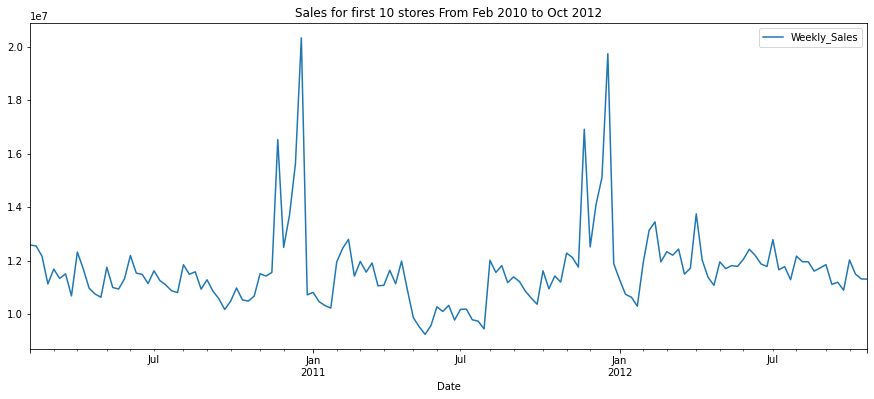

In [ ]:
%matplotlib inline
# plot data
df_arima_10.plot(figsize=(15, 6),title="Sales for first 10 stores From Feb 2010 to Oct 2012")

We can see that there are some clear patterns in the data. Through simple eye-balling, there are four spikes in sales around November, December, February, and April.

In [ ]:
df_arima_10.index = pd.to_datetime(df_arima_10.index)

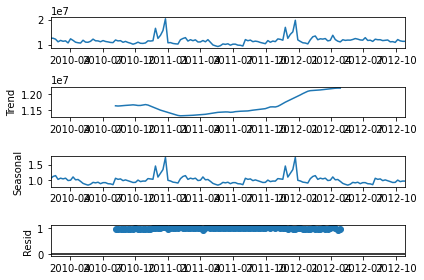

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_arima_10, model='multiplicative')
fig = result.plot()


From the plot above we can clearly see the seasonal component of the data, and we can also see the separated bumpy trend of the data.

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df_arima_10, start_p=1, d=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4116.651, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4177.359, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4139.465, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4116.047, Time=0.37 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4158.831, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4117.531, Time=0.40 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4117.449, Time=0.65 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4135.301, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4119.272, Time=16.72 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4115.210, Time=0.36 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=4137.943, Time=12.17 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4151.536, Time=0.24 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=4124.379, Time=13.13 sec
 ARIMA(1,1,0)(0,1,1)[

In [ ]:
train = df_arima_10.loc[:'2012-05-01']
valid = df_arima_10.loc['2012-05-01':]
test = df_arima_11_35.loc['2012-05-01':]
stepwise_model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
train_arima = train.reset_index(drop=True)
train_arima = train_arima.values

valid_arima = valid.reset_index(drop=True)
valid_arima = valid_arima.values

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA

predictions = list()
#X = train.values
history = [x for x in train_arima]
predictions = list()
# walk-forward validation
for t in range(len(train_arima)):
	model = ARIMA(history, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = train_arima[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))



In [ ]:
# evaluate forecasts
rmse_arima = round(sqrt(mean_squared_error(train_arima, predictions)),2)
print('Train RMSE for ARIMA: %.2f' % rmse_arima)

r2_arima = (r2_score(train_arima, predictions)).round(2)
print("R2 for ARIMA :",r2_arima)

Train RMSE for ARIMA: 1821725.00
R2 for ARIMA : -0.19


<AxesSubplot:title={'center':'Sales for all stores from Feb 2010 to May 2012'}, xlabel='Date'>

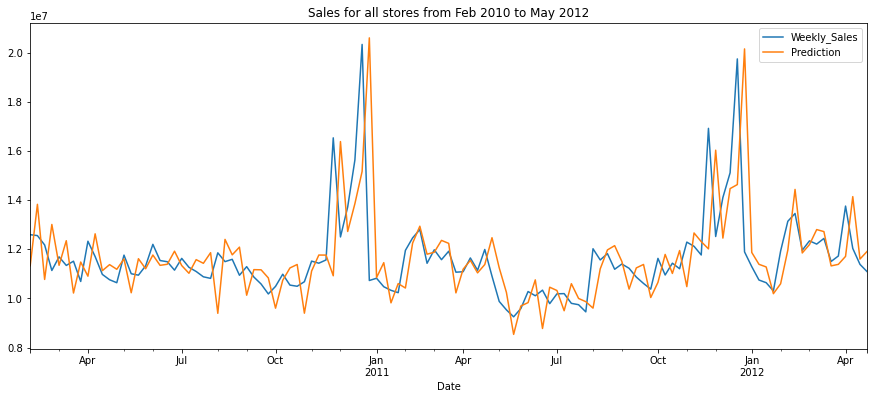

In [ ]:
# plot forecasts against actual outcomes

future_forecast = pd.DataFrame(predictions,index = train.index,columns=['Prediction'])
pd.concat([train,future_forecast],axis=1).plot(figsize=(15, 6),
                                             title="Sales for all stores from Feb 2010 to May 2012")

<AxesSubplot:title={'center':'Sales for first 10 stores From May 2012 to Oct 2012'}, xlabel='Date'>

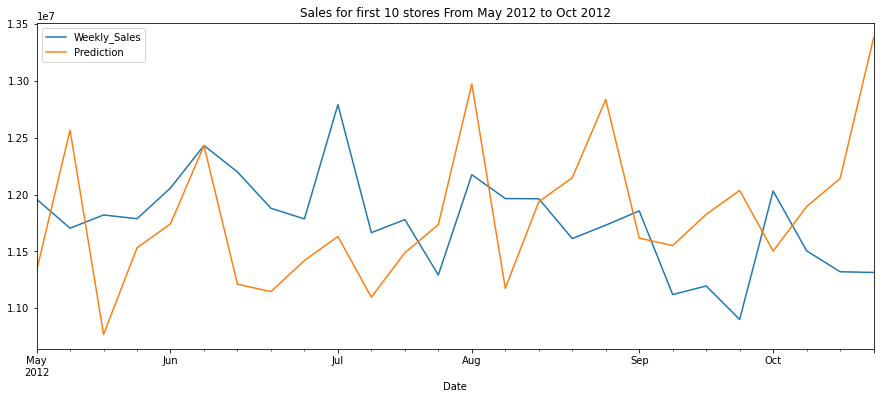

In [ ]:
## Prediction on validation dataset

future_forecast = stepwise_model.predict(n_periods=len(valid))
future_forecast = pd.DataFrame(future_forecast,index = valid.index,columns=['Prediction'])
pd.concat([valid,future_forecast],axis=1).plot(figsize=(15, 6),title="Sales for first 10 stores From May 2012 to Oct 2012")

<AxesSubplot:title={'center':'Sales for first 10 stores From Feb 2010 to Oct 2012'}, xlabel='Date'>

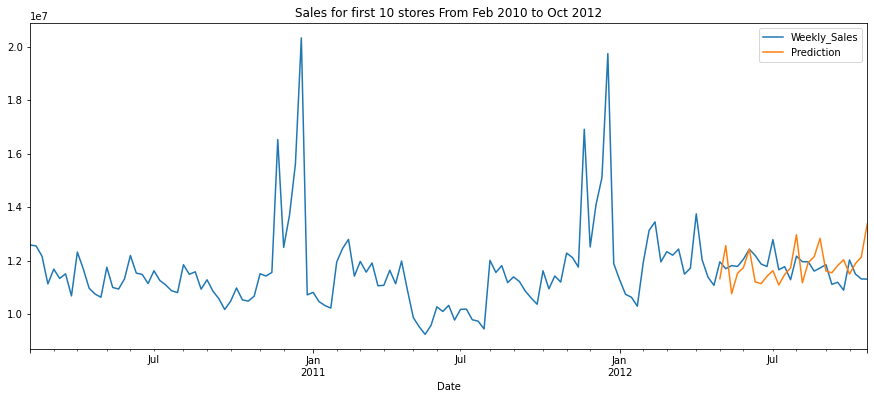

In [ ]:
pd.concat([df_arima_10,future_forecast],axis=1).plot(figsize=(15, 6),
                                             title="Sales for first 10 stores From Feb 2010 to Oct 2012")

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA

predictions = list()
#X = train.values
history = [x for x in train_arima]
predictions = list()
# walk-forward validation
for t in range(len(valid_arima)):
	model = ARIMA(history, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = valid_arima[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))



In [ ]:
# evaluate forecasts
rmse_arima_valid = round(sqrt(mean_squared_error(valid_arima, predictions)),2)
print('Train RMSE for ARIMA: %.2f' % rmse_arima_valid)


Train RMSE for ARIMA: 858214.22


Now we have a forecast model that can predict the sales of the coming weeks. With real-world data, the predictions will almost never be 100% in sync with the data, but we can see that the predictions stay in a reasonable range for off-holiday season sales. We can use the forecast information to optimize staffing and other resources.

##### Predicting sales for stores 11 to 35 from May 2011 to Oct 2012

<AxesSubplot:title={'center':'Sales for Stores 11 to 35  stores From May 2012 to Oct 2012'}, xlabel='Date'>

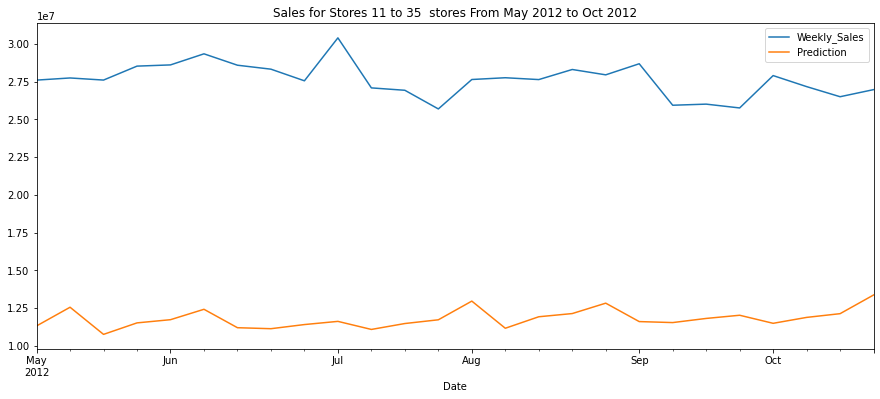

In [ ]:
# Predicting sales on test data
future_forecast = stepwise_model.predict(n_periods=len(test))
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot(figsize=(15, 6),title="Sales for Stores 11 to 35  stores From May 2012 to Oct 2012")

<AxesSubplot:title={'center':'Sales for Stores 11 to 35 stores From Feb 2010 to Oct 2012'}, xlabel='Date'>

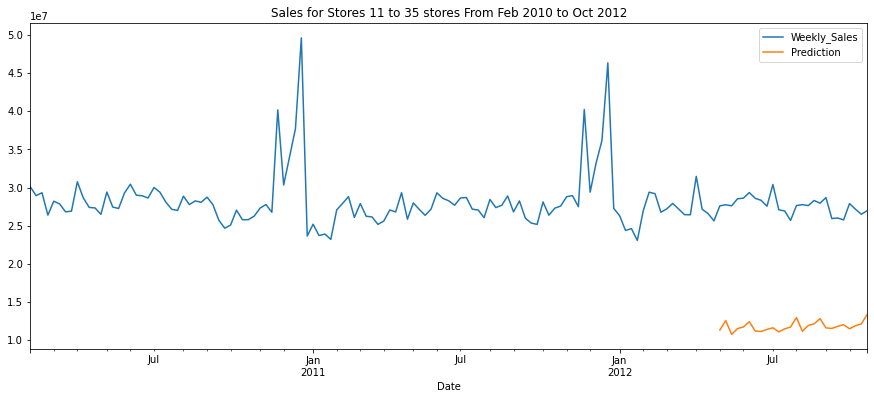

In [ ]:
pd.concat([df_arima_11_35,future_forecast],axis=1).plot(figsize=(15, 6),
                                             title="Sales for Stores 11 to 35 stores From Feb 2010 to Oct 2012")

In [ ]:
rmse_arima_test = round(sqrt(mean_squared_error(test.values, future_forecast.values)),2)
print('Root mean squared error for stores 11 to 35', rmse_arima_test)

Root mean squared error for stores 11 to 35 15865484.74


In [ ]:
report_table_regresion = report_table_regresion + [['ARIMA',r2_arima, rmse_arima,rmse_arima_valid,rmse_arima_test ]]

In [ ]:
report_table_regresion

[['Linear Regression', 0.74, 15540.46, 15837.16, 21149.1],
 ['Linear Regression with PCA', 0.36, 24381.53, 24691.9, 31788.7],
 ['ARIMA', -0.19, 1821725.0, 858214.22, 15865484.74]]

### **Ridge Regression**

In [ ]:
model_rdg = Ridge(alpha=1.0)
model_rdg.fit(X_train_lr, y_train_lr)
r2_rdg = model_rdg.score(X_train_lr, y_train_lr).round(2)
print("R2 for Ridge regression :",model_rdg.score(X_train_lr, y_train_lr).round(2))

R2 for Ridge regression : 0.63


In [ ]:
pred_rdg = model_rdg.predict(X_valid_lr)
rmse_rdg = np.sqrt(mean_squared_error(y_valid_lr,pred_rdg))
print("Root Mean Squared Error for Ridge Regression:",rmse_rdg.round(2))

Root Mean Squared Error for Ridge Regression: 15663.85


##### Hyperparameter Tuning

In [ ]:
model_rdg = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_rdg, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_lr, y_train_lr)
# summarize
print('RMSE: %.2f' % results.best_score_)
print('Config: %s' % results.best_params_)

RMSE: -15391.54
Config: {'alpha': 0.14}


##### Training Model with best parameter

In [ ]:
model_rdg = Ridge(alpha=0.14)
model_rdg.fit(X_train_lr, y_train_lr)
r2_rdg = model_rdg.score(X_train_lr, y_train_lr).round(2)
print("R2 for Ridge regression :",model_rdg.score(X_train_lr, y_train_lr).round(2))

R2 for Ridge regression : 0.62


In [ ]:
pred_rdg = model_rdg.predict(X_valid_lr)
rmse_rdg_valid = np.sqrt(mean_squared_error(y_valid_lr,pred_rdg))
print("Root Mean Squared Error for Ridge Regression (Validation):",rmse_rdg_valid.round(2))

Root Mean Squared Error for Ridge Regression (Validation): 15832.42


In [ ]:
pred_rdg = model_rdg.predict(X_train_lr)
rmse_rdg_train = np.sqrt(mean_squared_error(y_train_lr,pred_rdg))
print("Root Mean Squared Error for Ridge Regression (Training):",rmse_rdg_train.round(2))

Root Mean Squared Error for Ridge Regression (Training): 15535.2


##### Prediction for stores 11 to 35

In [ ]:
pred_11_35 = model_rdg.predict(X_test_11_35)

In [ ]:
rmse_rdg_test = np.sqrt(mean_squared_error(y_test_11_35,pred_11_35))
print("Root Mean Squared Error for stores 11 to 35:",rmse_rdg_test.round(2))

Root Mean Squared Error for stores 11 to 35: 26712.02


In [ ]:
report_table_regresion = report_table_regresion + [['Ridge Regression',r2_rdg,rmse_rdg_train, rmse_rdg_valid,rmse_rdg_test ]]

### **Boosting**


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model_ada = AdaBoostRegressor(random_state=0, n_estimators=100)
model_ada.fit(X_train_lr, y_train_lr)
r2_ada = model_ada.score(X_train_lr, y_train_lr).round(2)
print("R2 for Ada Boost regression :",model_ada.score(X_train_lr, y_train_lr).round(2))

R2 for Ada Boost regression : -0.62


In [ ]:
pred_ada = model_ada.predict(X_valid_lr)
rmse_ada = np.sqrt(mean_squared_error(y_valid_lr,pred_ada))
print("Root Mean Squared Error for Ada Boost regression:",rmse_ada.round(2))

Root Mean Squared Error for Ada Boost regression: 19602.39


##### Hyperparameter Tuning

In [ ]:
model_ada=AdaBoostRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
search_grid={'n_estimators':[50,100,200],'learning_rate':[0.01,0.1],'random_state':[1]}
search=GridSearchCV(estimator=model_ada,param_grid=search_grid,scoring='neg_root_mean_squared_error',n_jobs=1,cv=cv)

# perform the search
results = search.fit(X_train_lr, y_train_lr)
# summarize
print('RMSE: %.2f' % results.best_score_)
print('Config: %s' % results.best_params_)

RMSE: -19469.65
Config: {'learning_rate': 0.01, 'n_estimators': 200, 'random_state': 1}


##### Training Model with best parameter

In [ ]:
model_ada = AdaBoostRegressor(random_state=1, n_estimators=200, learning_rate=0.01)
model_ada.fit(X_train_lr, y_train_lr)
r2_ada = model_ada.score(X_train_lr, y_train_lr).round(2)
print("R2 for Ada Boost regression :",model_ada.score(X_train_lr, y_train_lr).round(2))

R2 for Ada Boost regression : 0.41


In [ ]:
pred_ada = model_ada.predict(X_valid_lr)
rmse_ada_valid = np.sqrt(mean_squared_error(y_valid_lr,pred_ada)).round(2)
print("Root Mean Squared Error for Ada Boost regression(Validation):",rmse_ada_valid.round(2))

Root Mean Squared Error for Ada Boost regression(Validation): 19602.39


In [ ]:
pred_ada = model_ada.predict(X_train_lr)
rmse_ada_train = np.sqrt(mean_squared_error(y_train_lr,pred_ada)).round(2)
print("Root Mean Squared Error for Ada Boost regression(Training):",rmse_ada_train.round(2))

Root Mean Squared Error for Ada Boost regression(Training): 19376.09


##### Prediction for stores 11 to 35

In [ ]:
pred_11_35_ada = model_ada.predict(X_test_11_35)

In [ ]:
rmse_ada_test = np.sqrt(mean_squared_error(y_test_11_35,pred_11_35_ada)).round(2)
print("Root Mean Squared Error for stores 11 to 35:",rmse_ada_test.round(2))

Root Mean Squared Error for stores 11 to 35: 23763.55


In [ ]:
report_table_regresion = report_table_regresion + [['Ada Boosting Regressor',r2_ada,rmse_ada_train, rmse_ada_valid,rmse_ada_test ]]

In [ ]:
report_table_regresion

[['Linear Regression', 0.74, 15540.46, 15837.16, 21149.1],
 ['Linear Regression with PCA', 0.36, 24381.53, 24691.9, 31788.7],
 ['ARIMA', -0.19, 1821725.0, 858214.22, 15865484.74],
 ['Ridge Regression',
  0.62,
  15535.201539415988,
  15832.421290803464,
  26712.022439478336],
 ['Ada Boosting Regressor',
  0.41,
  19376.08572725881,
  19602.391357757046,
  23763.546059587137]]

## **Results**

In [ ]:
report_reg = pd.DataFrame(report_table_regresion,columns = ['Model name', 'R-Squared', 'Training RMSE','Validation RMSE','Test (Store 11-35) RMSE'])
#report.index = report['Model name']
report_reg.round(2)

,Model name,R-Squared,Training RMSE,Validation RMSE,Test (Store 11-35) RMSE
0,Linear Regression,0.74,15540.46,15837.16,21149.10
1,Linear Regression with PCA,0.36,24381.53,24691.90,31788.70
2,ARIMA,-0.19,1821725.00,858214.22,15865484.74
3,Ridge Regression,0.62,15535.20,15832.42,26712.02
4,Ada Boosting Regressor,0.41,19376.09,19602.39,23763.55


##**2nd Problem Statement**

a.	Consider the problem statement as multi-label classification problem. Use the below classification algorithms and perform hyper-parameter tuning for the Deep Learning models. 
•	Ensemble models (3 statistical methods)
•	Recurrent neural network (RNN)
•	Convolutional Neural Networks (CNN)


In [ ]:
class_train_df =  classification_df

In [ ]:
#class_train_df.Dept = class_train_df.Dept.astype(str)

In [ ]:
class_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339369 entries, 0 to 340286
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  339369 non-null  int64         
 1   Dept                   339369 non-null  int64         
 2   Date                   339369 non-null  datetime64[ns]
 3   Weekly_Sales           339369 non-null  float64       
 4   IsHoliday              339369 non-null  bool          
 5   Temperature            339369 non-null  float64       
 6   gas_price              339369 non-null  float64       
 7   discount_promotional   339369 non-null  float64       
 8   discount_clearance     339369 non-null  float64       
 9   discount_damaged_good  339369 non-null  float64       
 10  CPI                    339369 non-null  float64       
 11  Unemployment           339369 non-null  float64       
 12  Type                   339369 non-null  obje

In [ ]:
class_train_df = class_train_df.drop(['Store','Date','Month','Year','IsHoliday','IsGiven_Promotional','IsGiven_Clearance','IsGiven_Damaged_good'],axis=1)

In [ ]:
class_train_df

,Dept,Weekly_Sales,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,CPI,Unemployment,Type,Size
0,1,24924.50,59.33,3.360,9667.50,268.29,0.60,223.659114,6.833,A,151315
1,1,46039.49,51.65,3.409,8687.47,1594.87,2.20,223.753643,6.833,A,151315
2,1,41595.55,52.39,3.510,2706.87,3128.74,1.88,223.917015,6.833,A,151315
3,1,19403.54,60.12,3.555,6129.28,1802.84,0.00,224.132020,6.833,A,151315
4,1,21827.90,61.65,3.630,3552.58,601.32,0.00,224.347025,6.833,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
340282,98,68.48,64.92,3.997,20867.96,42.64,3.22,142.765750,8.839,B,103681
340283,98,46.55,64.50,3.985,6855.08,0.00,3.66,142.851683,8.665,B,103681
340284,98,80.95,55.40,4.000,1524.37,0.00,5.33,142.937617,8.665,B,103681
340285,98,67.80,56.53,3.969,2694.71,0.00,4.98,142.863363,8.665,B,103681


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize


X_class = class_train_df.drop('Type',axis=1)

le = preprocessing.LabelEncoder()
y_class = le.fit_transform(class_train_df['Type'].values)

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_class,y_class,test_size = 0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

num_data_train = X_train_cl[['Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'CPI', 'Unemployment','Size','Weekly_Sales']]

num_data_test = X_test_cl[['Temperature',
       'gas_price', 'discount_promotional', 'discount_clearance',
       'discount_damaged_good', 'CPI', 'Unemployment','Size','Weekly_Sales']]


# update the cols with their normalized values
#class_train_df[num_data.columns] = sc.fit_transform(num_data)
X_train_cl[num_data_train.columns] = sc.fit_transform(num_data_train)
X_test_cl[num_data_test.columns] = sc.transform(num_data_test)

# convert string variable to One Hot Encoding
#class_train_df = pd.get_dummies(class_train_df, columns = ['Dept'])




### **Machine Learning Model**

#### **a. 1.Ensemble Methods**

**i. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

model_rf= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
model_rf.fit(X_train_cl,y_train_cl)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_cl = model_rf.predict(X_test_cl)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_cl, y_pred_cl)

print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test_cl, y_pred_cl))


Confusion Matrix : 
 [[35944     0     0]
 [    0 30516     0]
 [    0     0  1414]]
Accuracy :  1.0


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


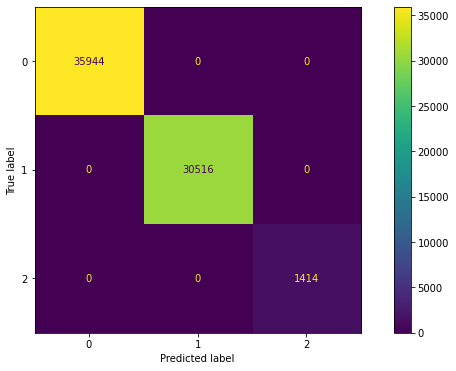

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

#X, y = make_classification(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
plot_confusion_matrix(model_rf, X_test_cl, y_test_cl)  
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test_cl, y_pred_cl, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test_cl)
    y_test_cl = lb.transform(y_test_cl)
    y_pred_cl = lb.transform(y_pred_cl)
    return roc_auc_score(y_test_cl, y_pred_cl, average=average)

In [ ]:
from sklearn.metrics import roc_auc_score,precision_score, recall_score,f1_score
report_table = [['Random Forest Classifier',model_rf.score(X_train_cl, y_train_cl)*100, model_rf.score(X_test_cl, y_test_cl)*100,
                 multiclass_roc_auc_score(y_test_cl,y_pred_cl),
                 precision_score(y_test_cl, model_rf.predict(X_test_cl),average='micro'), 
                 recall_score(y_test_cl, model_rf.predict(X_test_cl),average='micro'),
                 f1_score(y_test_cl, model_rf.predict(X_test_cl),average='micro') ]]

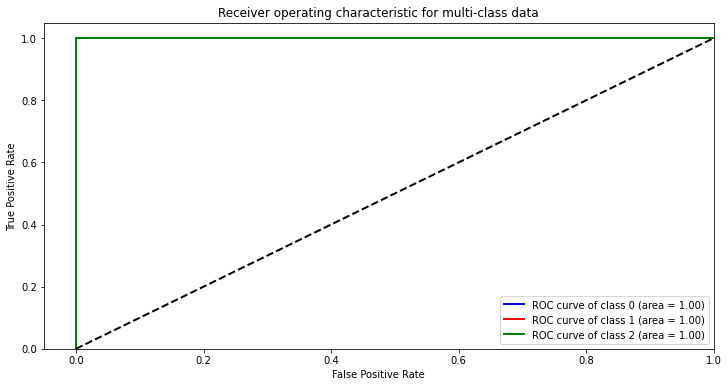

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

y_score = model_rf.predict_proba(X_test_cl)
n_classes =3

lb = LabelBinarizer()
lb.fit(y_test_cl)
y_test_cl_plot = lb.transform(y_test_cl)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cl_plot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

**ii. XGBoost**

In [ ]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model_xgb.fit(X_train_cl, y_train_cl)

XGBClassifier(learning_rate=0.01, objective='multi:softprob', random_state=1)

In [ ]:
y_pred_cl = model_xgb.predict(X_test_cl)

In [ ]:
cm = confusion_matrix(y_test_cl, y_pred_cl)

print ("Confusion Matrix : \n", cm)
print ("Accuracy : ", accuracy_score(y_test_cl, y_pred_cl))

Confusion Matrix : 
 [[35944     0     0]
 [    0 30516     0]
 [    0     0  1414]]
Accuracy :  1.0


In [ ]:
X_class.columns

Index(['Dept', 'Weekly_Sales', 'Temperature', 'gas_price',
       'discount_promotional', 'discount_clearance', 'discount_damaged_good',
       'CPI', 'Unemployment', 'Size'],
      dtype='object')

In [ ]:
print(np.concatenate((le.inverse_transform(y_pred_cl).reshape(len(y_pred_cl),1), le.inverse_transform(y_test_cl).reshape(len(y_test_cl),1)),axis=1))


[['A' 'A']
 ['A' 'A']
 ['B' 'B']
 ...
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']]


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


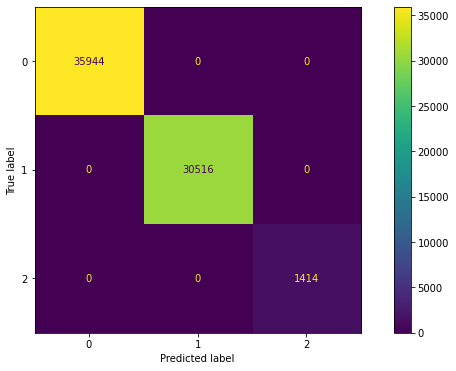

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_xgb, X_test_cl, y_test_cl)  
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test_cl, y_pred_cl, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test_cl)
    y_test_cl = lb.transform(y_test_cl)
    y_pred_cl = lb.transform(y_pred_cl)
    return roc_auc_score(y_test_cl, y_pred_cl, average=average)

In [ ]:

report_table = report_table + [['XG Boost',model_xgb.score(X_train_cl, y_train_cl)*100, model_xgb.score(X_test_cl, y_test_cl)*100,
                                multiclass_roc_auc_score(y_test_cl, y_pred_cl),
                                precision_score(y_test_cl, model_xgb.predict(X_test_cl),average='micro'),
                                recall_score(y_test_cl, model_xgb.predict(X_test_cl),average='micro'),
                                f1_score(y_test_cl,model_xgb.predict(X_test_cl),average='micro') ]]

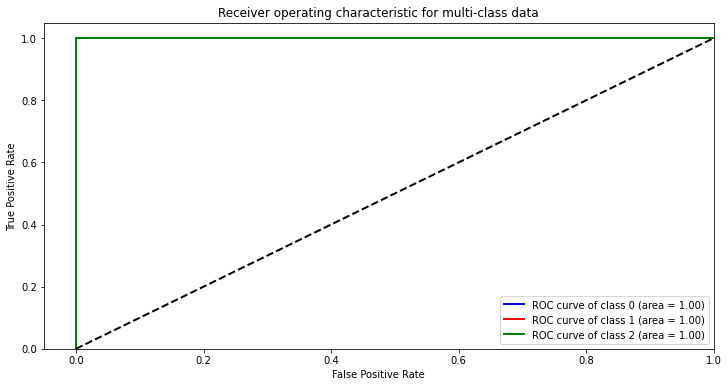

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

y_score = model_xgb.predict_proba(X_test_cl)
n_classes =3

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cl_plot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

**iii. LightGBM**

In [ ]:
import lightgbm as lgb

model_lgb=lgb.LGBMClassifier(random_state=1,learning_rate=0.01)
model_lgb.fit(X_train_cl, y_train_cl)

LGBMClassifier(learning_rate=0.01, random_state=1)

In [ ]:
y_pred_cl = model_lgb.predict(X_test_cl)

In [ ]:
cm = confusion_matrix(y_test_cl, y_pred_cl)

print ("Confusion Matrix : \n", cm)
print ("Accuracy : ", accuracy_score(y_test_cl, y_pred_cl))

Confusion Matrix : 
 [[35944     0     0]
 [    0 30516     0]
 [    0     0  1414]]
Accuracy :  1.0


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


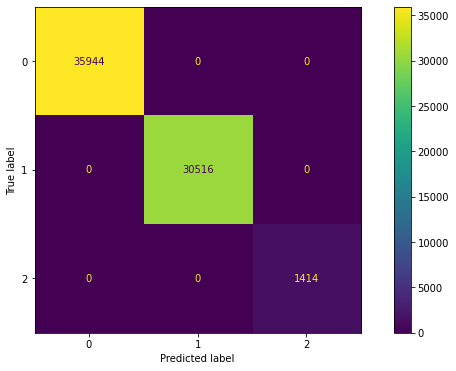

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

#X, y = make_classification(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
plot_confusion_matrix(model_lgb, X_test_cl, y_test_cl)  
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test_cl, y_pred_cl, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test_cl)
    y_test_cl = lb.transform(y_test_cl)
    y_pred_cl = lb.transform(y_pred_cl)
    return roc_auc_score(y_test_cl, y_pred_cl, average=average)

In [ ]:

report_table = report_table + [['Light GBM',model_lgb.score(X_train_cl, y_train_cl)*100, model_lgb.score(X_test_cl, y_test_cl)*100,
                                multiclass_roc_auc_score(y_test_cl, y_pred_cl), 
                                precision_score(y_test_cl, model_lgb.predict(X_test_cl),average='micro'),
                                recall_score(y_test_cl, model_lgb.predict(X_test_cl),average='micro'),
                                f1_score(y_test_cl, model_lgb.predict(X_test_cl),average='micro') ]]

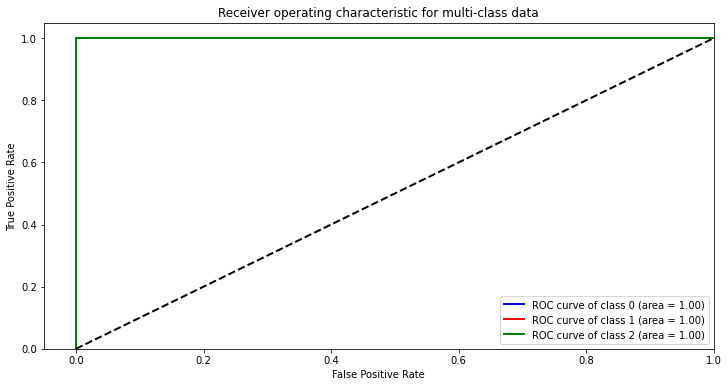

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

y_score = model_lgb.predict_proba(X_test_cl)
n_classes =3

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cl_plot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

#### **a.2.Recurrent neural network (RNN)**

In [ ]:
from keras.layers import LeakyReLU
from keras.layers import Dense, LSTM,Flatten
from keras.layers import Dropout, Activation, Bidirectional
from keras.models import Sequential

In [ ]:
model_rnn=Sequential()
model_rnn.add(LSTM(10, input_shape=(10,1),return_sequences=True))
model_rnn.add(LeakyReLU(alpha=0.1))
model_rnn.add(LSTM(5))
model_rnn.add(LeakyReLU(alpha=0.1))
model_rnn.add(Dense(1, activation='softmax'))
model_rnn.add(Flatten())
#start= time.time()
model_rnn.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['acc'])

In [ ]:
y_train_cl_rnn = y_train_cl.reshape((-1,1))
model_rnn.fit(X_train_cl, y_train_cl, epochs=44,batch_size=335)

Epoch 1/44
811/811 [==============================] - 16s 14ms/step - loss: 5.9200e-08 - acc: 0.4543
Epoch 2/44
811/811 [==============================] - 11s 14ms/step - loss: 5.9200e-08 - acc: 0.4543
Epoch 3/44
811/811 [==============================] - 15s 18ms/step - loss: 5.9200e-08 - acc: 0.4543
Epoch 4/44
811/811 [==============================] - 22s 27ms/step - loss: 5.9200e-08 - acc: 0.4543
Epoch 5/44
811/811 [==============================] - 14s 17ms/step - loss: 5.9200e-08 - acc: 0.4543
Epoch 6/44
811/811 [==============================] - 11s 14ms/step - loss: 5.9200e-08 - acc: 0.4543
Epoch 7/44
811/811 [==============================] - 11s 14ms/step - loss: 5.9200e-08 - acc: 0.4543
Epoch 8/44
811/811 [==============================] - 12s 15ms/step - loss: 5.9200e-08 - acc: 0.4543
Epoch 9/44
811/811 [==============================] - 12s 14ms/step - loss: 5.9200e-08 - acc: 0.4543
Epoch 10/44
811/811 [==============================] - 11s 14ms/step - loss: 5.9200e-08 - a

In [ ]:
scores = model_rnn.evaluate(X_test_cl, y_test_cl)
print("\n%s: %.2f%%" % (model_rnn.metrics_names[1], scores[1]*100))

2122/2122 [==============================] - 12s 5ms/step - loss: 5.8563e-08 - acc: 0.4496

acc: 44.96%


In [ ]:
import itertools

def plot_confusion_matrix_custom(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#y_test_arg=np.argmax(y_test_cl,axis=-1)
y_pred_cl = np.round(model_rnn.predict(X_test_cl),0)

cm = confusion_matrix(y_test_cl, y_pred_cl)


2122/2122 [==============================] - 9s 4ms/step


In [ ]:
cm_plot_labels = ['Type_A','Type_B','Type_C']

Confusion matrix, without normalization
[[    0 35944     0]
 [    0 30516     0]
 [    0  1414     0]]


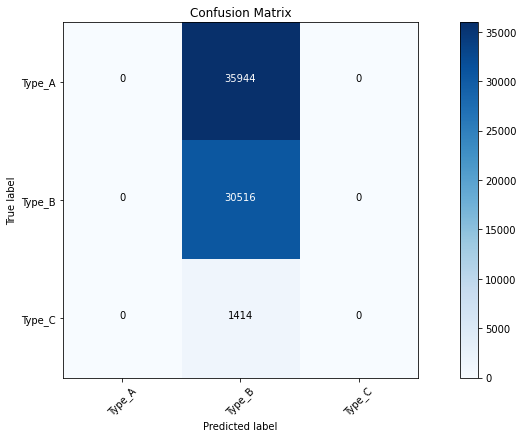

In [ ]:
plot_confusion_matrix_custom(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test_cl, y_pred_cl, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test_cl)
    y_test_cl = lb.transform(y_test_cl)
    y_pred_cl = lb.transform(y_pred_cl)
    return roc_auc_score(y_test_cl, y_pred_cl, average=average)

In [ ]:
report_table = report_table + [['RNN',model_rnn.evaluate(X_train_cl, y_train_cl)[1]*100, model_rnn.evaluate(X_test_cl, y_test_cl)[1]*100,
                 #multiclass_roc_auc_score(y_test_cl, model_rnn.predict(X_test_cl)[:,1]), 
                 multiclass_roc_auc_score(y_test_cl, y_pred_cl),
                 precision_score(y_test_cl,np.argmax(model_rnn.predict(X_test_cl),axis=1),average='micro'), 
                 recall_score(y_test_cl, np.argmax(model_rnn.predict(X_test_cl),axis=1),average='micro'),
                 f1_score(y_test_cl, np.argmax(model_rnn.predict(X_test_cl),axis=1),average='micro')]]
                                              

2122/2122 [==============================] - 7s 4ms/step


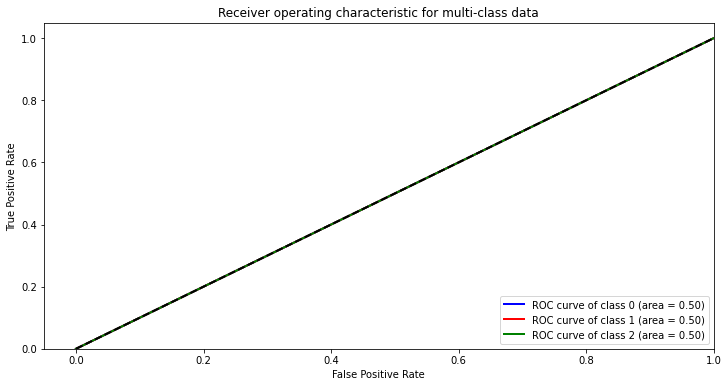

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

y_score = lb.transform(y_pred_cl)
n_classes =3

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cl_plot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

#### **a.3.Convolutional Neural Networks (CNN)**

##### **Tuning CNN**

In [ ]:
%pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier

from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
import pickle
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
        
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(3, activation='sigmoid'))
        nn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
        return nn
    
    es = EarlyStopping(monitor='acc', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train_cl, y_train_cl, scoring=score_acc, cv=2,error_score="raise", fit_params={'callbacks':[es]}).mean()
    #score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold).mean()
    
    return score

In [ ]:
score_acc = make_scorer(accuracy_score)

params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}

# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=1, n_iter=2)

|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------
4243/4243 [==============================] - 6s 1ms/step
| 1         | 0.525     | 5.51      | 335.3     | 54.88     | 0.7716    | 36.58     | 1.044     |
4243/4243 [==============================] - 5s 1ms/step
| 2         | 0.7985    | 7.588     | 234.1     | 72.25     | 0.4108    | 27.87     | 4.56      |
4243/4243 [==============================] - 5s 1ms/step
| 3         | 0.5245    | 6.051     | 229.7     | 66.26     | 0.588     | 31.69     | 5.521     |


In [ ]:
params_nn_ = nn_bo.max['params']

activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]

params_nn_

{'activation': <keras.layers.activation.leaky_relu.LeakyReLU at 0x7f3433150f70>,
 'batch_size': 234.14542248533616,
 'epochs': 72.24925417637417,
 'learning_rate': 0.41077155473442445,
 'neurons': 27.86815396909978,
 'optimizer': 4.559558457234436}

###### Determining layers

In [ ]:
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
        
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
        
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
        
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(3, activation='sigmoid'))
        nn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
        
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train_cl, y_train_cl, scoring=score_acc, cv=2, fit_params={'callbacks':[es]}).mean()
    
    return score

In [ ]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=1, n_iter=2)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
4243/4243 [==============================] - 5s 1ms/step
| 1         | 0.9515    | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 31.48     | 0.3377    | 6.935     |
4243/4243 [==============================] - 6s 1ms/step
| 2         | 0.5245    | 3.206     | 356.6     | 0.3746    | 0.1156    | 38.6      | 1.242     | 2.24      | 0.2611    | 34.51     | 0.7411    | 6.588     |
4243/4243 [==============================] - 6s 1ms/step
| 3         | 0.5245    | 7.131     | 335.6     | 0.06168   | 0.2022    | 42.97     | 2.113     | 1.96      | 0.1115    | 35.93     | 0.4943    | 5.055     |


In [ ]:
params_nn_ = nn_bo.max['params']

learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]

params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]

params_nn_

{'activation': 'elu',
 'batch_size': 335,
 'dropout': 0.4360590193711702,
 'dropout_rate': 0.23077874175693686,
 'epochs': 44,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.42602224734191213,
 'neurons': 31,
 'normalization': 0.33765619188879237,
 'optimizer': <keras.optimizers.optimizer_v2.ftrl.Ftrl at 0x7f342ddf4760>}

##### **Creating Model with best parameter**

In [ ]:
model_cnn = Sequential()
model_cnn.add(Dense(31, input_dim=10, activation='elu'))
model_cnn.add(Dense(31, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
model_cnn.compile(loss='categorical_crossentropy', optimizer=params_nn_['optimizer'], metrics=['acc'])

In [ ]:
model_cnn.fit(X_train_cl, y_train_cl, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'])

Epoch 1/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 2/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 3/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 4/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 5/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 6/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 7/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 8/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 9/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 10/44
811/811 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.5245
Epoch 11/

In [ ]:
scores = model_cnn.evaluate(X_test_cl, y_test_cl)
print("\n%s: %.2f%%" % (model_rnn.metrics_names[1], scores[1]*100))


2122/2122 [==============================] - 3s 1ms/step - loss: 0.0000e+00 - acc: 0.5296

acc: 52.96%


In [ ]:
y_predict_cl=model_cnn.predict(X_test_cl)
rounded_predictions = (y_predict_cl).round(0)

cm = confusion_matrix(y_true=y_test_cl, y_pred=rounded_predictions)


2122/2122 [==============================] - 3s 1ms/step


In [ ]:
cm_plot_labels = ['Type_A','Type_B','Type_C']

Confusion matrix, without normalization
[[35944     0     0]
 [30516     0     0]
 [ 1414     0     0]]


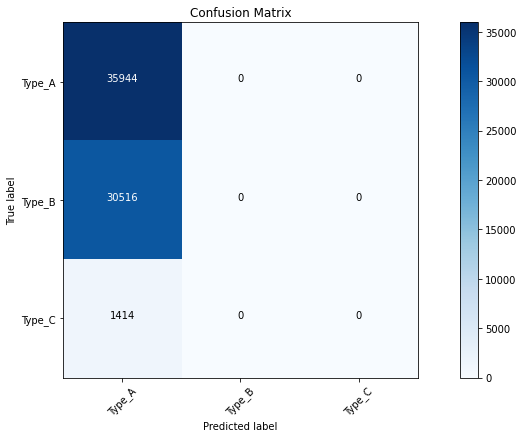

In [ ]:
plot_confusion_matrix_custom(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test_cl, y_pred_cl, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test_cl)
    y_test_cl = lb.transform(y_test_cl)
    y_pred_cl = lb.transform(y_pred_cl)
    return roc_auc_score(y_test_cl, y_pred_cl, average=average)

In [ ]:
report_table = report_table + [['CNN',model_cnn.evaluate(X_train_cl, y_train_cl)[1]*100, model_cnn.evaluate(X_test_cl, y_test_cl)[1]*100,
                 multiclass_roc_auc_score(y_test_cl, model_cnn.predict(X_test_cl).round(0)), 
                 precision_score(y_test_cl,model_cnn.predict(X_test_cl).round(0),average='micro'), 
                 recall_score(y_test_cl, model_cnn.predict(X_test_cl).round(0),average='micro'),
                 f1_score(y_test_cl, model_cnn.predict(X_test_cl).round(0),average='micro')]]
                                              

2122/2122 [==============================] - 3s 1ms/step


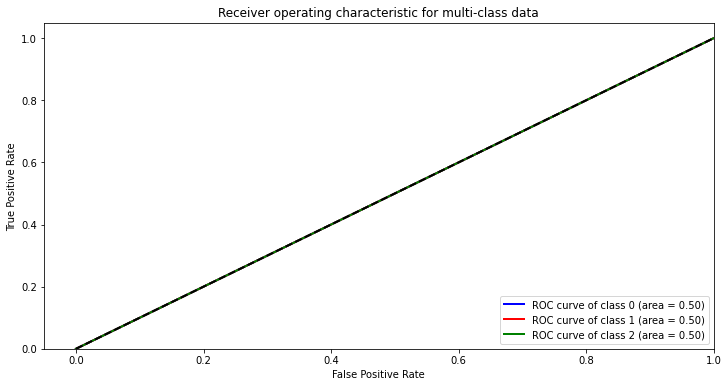

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

y_score = lb.transform(rounded_predictions)
n_classes =3

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cl_plot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### Result Table

In [ ]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Train accuracy %', 'Test accuracy %','ROC-AUC Score','Precison','Recall','F1- score'])
#report.index = report['Model name']
report.round(2)

,Model name,Train accuracy %,Test accuracy %,ROC-AUC Score,Precison,Recall,F1- score
0,Random Forest Classifier,100.00,100.00,1.0,1.00,1.00,1.00
1,XG Boost,100.00,100.00,1.0,1.00,1.00,1.00
2,Light GBM,100.00,100.00,1.0,1.00,1.00,1.00
3,RNN,45.43,44.96,0.5,0.53,0.53,0.53
4,CNN,52.45,52.96,0.5,0.53,0.53,0.53
